# LlamaIndex

## Overview

### Introduction

**Agents**

- Tác nhân là các trợ lý tri thức sử dụng mô hình ngôn ngữ lớn (LLM) và các công cụ để thực hiện nhiệm vụ như nghiên cứu, trích xuất dữ liệu, v.v.
- Chúng có thể đơn giản như trả lời câu hỏi hoặc phức tạp hơn như cảm nhận, ra quyết định và hành động để hoàn thành nhiệm vụ.
- LlamaIndex cung cấp khung để xây dựng tác nhân, trong đó tích hợp RAG (Retrieval-Augmented Generation) như một công cụ hỗ trợ.

**Workflows**

- Quy trình công việc là các quá trình đa bước kết hợp nhiều tác nhân, trình kết nối dữ liệu và công cụ để hoàn thành nhiệm vụ.
- Chúng là phần mềm điều khiển bởi sự kiện, cho phép kết hợp nguồn dữ liệu RAG và nhiều tác nhân để tạo ứng dụng phức tạp, có khả năng tự phản ánh, sửa lỗi và các đặc điểm của ứng dụng LLM tiên tiến.
- Có thể triển khai các quy trình này dưới dạng microservices sản xuất.

**Context Augmentation**

- LLM cung cấp giao diện ngôn ngữ tự nhiên giữa con người và dữ liệu, nhưng không được huấn luyện trên dữ liệu riêng của bạn (ví dụ: dữ liệu trong API, cơ sở dữ liệu SQL, PDF).
- Tăng cường ngữ cảnh giúp LLM truy cập dữ liệu của bạn để giải quyết vấn đề cụ thể.
- LlamaIndex cung cấp công cụ để ingest, parse, index và process, đồng thời triển khai nhanh các complex query workflows combining data access with LLM prompting. Ví dụ phổ biến nhất là RAG, kết hợp ngữ cảnh với LLM tại thời điểm suy luận.

**LlamaIndex**: là framework designed to build and manage the end-to-end lifecycle LLM-based application. **LlamaIndex** không giới hạn cách sử dụng LLM (tự động hoàn thành, chatbot, tác nhân, v.v.), mà giúp việc sử dụng dễ dàng hơn với các công cụ:
- **Data ingestion**: Nhập dữ liệu từ nguồn gốc như API, PDF, SQL, v.v.
- **Data indexing**: Cấu trúc dữ liệu thành dạng trung gian để LLM dễ sử dụng.
- **Engines**:
  - **Query Engine**: Giao diện mạnh mẽ cho hỏi-đáp (ví dụ: quy trình RAG).
  - **Chat Engine**: Giao diện hội thoại cho tương tác đa tin nhắn.
- **Agent**: Trợ lý tri thức dùng LLM và công cụ như hàm trợ giúp hoặc tích hợp API.
- **Observability/Evaluation**: Thử nghiệm, đánh giá và giám sát ứng dụng.
- **Workflows**: Kết hợp tất cả phần trên thành an event-driven system, linh hoạt hơn các cách tiếp cận dựa trên graph-based approaches.

### Use cases

Some popular use cases for LlamaIndex and context augmentation in general include:

- [Question-Answering](https://docs.llamaindex.ai/en/stable/use_cases/q_and_a/) (Retrieval-Augmented Generation aka RAG)
- [Chatbots](https://docs.llamaindex.ai/en/stable/use_cases/chatbots/)
- [Document Understanding and Data Extraction](https://docs.llamaindex.ai/en/stable/use_cases/extraction/)
- [Autonomous Agents](https://docs.llamaindex.ai/en/stable/use_cases/agents/) that can perform research and take actions
- [Multi-modal applications](https://docs.llamaindex.ai/en/stable/use_cases/multimodal/) that combine text, images, and other data types
- [Fine-tuning](https://docs.llamaindex.ai/en/stable/use_cases/fine_tuning/) models on data to improve performance

Check out our [use cases](https://docs.llamaindex.ai/en/stable/use_cases/) documentation for more examples and links to tutorials.

### How to LlamaIndex work

LlamaIndex hoạt động theo ba giai đoạn chính: **Nhập dữ liệu (Ingestion)**, **Lập chỉ mục (Indexing)**, và **Truy vấn (Querying)**. Những giai đoạn này kết nối dữ liệu của bạn với LLM để cung cấp câu trả lời chính xác hoặc thực hiện nhiệm vụ dựa trên thông tin bạn cung cấp.

![](https://docs.llamaindex.ai/en/stable/_static/getting_started/basic_rag.png)

1. **Data Ingestion**

- **Mục đích**: Đưa dữ liệu riêng của bạn (từ PDF, cơ sở dữ liệu, API, v.v.) vào hệ thống để LLM có thể sử dụng.
- **Cách thực hiện**:
    - LlamaIndex sử dụng **trình kết nối dữ liệu (data connectors)** để đọc dữ liệu từ nhiều nguồn khác nhau như tệp văn bản, PDF, SQL, hoặc API.
    - Ví dụ: Bạn có thể dùng **SimpleDirectoryReader** để tải tất cả tệp trong một thư mục hoặc **LlamaHub** để kết nối với hàng trăm nguồn dữ liệu khác nhau.
    - Công cụ như **LlamaParse** giúp phân tích cú pháp tài liệu phức tạp (như PDF) để trích xuất thông tin chính xác.

2. **Indexing**

- **Mục đích**: Sắp xếp và cấu trúc dữ liệu để LLM dễ truy cập và xử lý nhanh chóng.
- **Cách thực hiện**:
    - Dữ liệu được chuyển thành các **vector embedding** (biểu diễn số của văn bản) bằng các mô hình nhúng (embedding models) như OpenAI, HuggingFace, hoặc mô hình cục bộ.
    - Các embedding này được lưu trữ trong một **cơ sở dữ liệu vector** (vector store), tạo thành một chỉ mục (index).
    - Chỉ mục này giống như một "bản đồ" giúp LLM tìm kiếm thông tin liên quan mà không cần đọc toàn bộ dữ liệu từ đầu mỗi lần.

3. **Querying**

- **Mục đích**: Sử dụng LLM để trả lời câu hỏi hoặc thực hiện nhiệm vụ dựa trên dữ liệu đã lập chỉ mục.
- **Cách thực hiện**:
    - Khi bạn đặt câu hỏi, LlamaIndex tìm kiếm trong chỉ mục để lấy các phần dữ liệu liên quan nhất (thường dùng kỹ thuật **RAG - Retrieval-Augmented Generation**).
    - Dữ liệu này được kết hợp với câu hỏi của bạn và gửi đến LLM để tạo câu trả lời.
    - Có nhiều cách truy vấn:
        - **Query Engine**: Trả lời câu hỏi đơn giản (ví dụ: "Doanh thu năm 2023 là bao nhiêu?").
        - **Chat Engine**: Hỗ trợ hội thoại qua lại.
        - **Agents**: Thực hiện nhiệm vụ phức tạp hơn như phân tích hoặc nghiên cứu.

---

**Ví dụ cụ thể về cách hoạt động**

Giả sử bạn có một thư mục chứa các tài liệu PDF về báo cáo tài chính:

1. **Data Ingest**: Bạn chạy mã để tải tất cả PDF bằng SimpleDirectoryReader.
2. **Index**: LlamaIndex chuyển nội dung PDF thành vector embedding và lưu vào cơ sở dữ liệu vector.
3. **Query**: Bạn hỏi "Tổng lợi nhuận năm 2024 là bao nhiêu?". LlamaIndex tìm đoạn văn bản liên quan trong chỉ mục, gửi nó cùng câu hỏi đến LLM (như GPT), và trả về câu trả lời chính xác.

---

**Các thành phần hỗ trợ hoạt động**

- **Tools**: LlamaIndex cho phép tích hợp các công cụ bổ sung (như API, hàm tùy chỉnh) để mở rộng khả năng của LLM.
- **Agents**: Các trợ lý thông minh dùng LLM và công cụ để thực hiện nhiệm vụ phức tạp, ví dụ: phân tích dữ liệu hoặc tự động trả lời email.
- **Workflows**: Điều khiển các bước bằng sự kiện, kết hợp nhiều tác nhân và nguồn dữ liệu để xử lý ứng dụng phức tạp.
- **Context Augmentation**: Đảm bảo LLM hiểu và sử dụng dữ liệu riêng của bạn thay vì chỉ dựa vào kiến thức chung.



In [1]:
from dotenv import load_dotenv

load_dotenv(r".env")


True

## Models

### LLMs

- Support for **text completion** and **chat** endpoints (details below)
- Support for **streaming** and **non-streaming** endpoints
- Support for **synchronous** and **asynchronous** endpoints

Check list of supported models in the [LLM Integrations](https://docs.llamaindex.ai/en/stable/module_guides/models/llms/modules/#available-llm-integrations).

#### Text Completion

In [ ]:
%pip install -qU llama-index-llms-openai

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from llama_index.llms.openai import OpenAI

model = OpenAI(
    model="gpt-4o-mini",
    temperature=0.2,
    max_tokens=50,
    additional_kwargs={"seed": 12345678, "top_p": 0.5},
)


- **normal mode**

In [ ]:
response = model.complete("Hello, how are you?")
print(response)


Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?


- **Streaming mode**: Kết quả trả về sẽ được trả về từng phần một, không phải là một câu hoàn chỉnh. Điều này có thể hữu ích trong các trường hợp mà bạn muốn nhận phản hồi ngay lập tức hoặc khi bạn đang làm việc với một mô hình lớn và không muốn chờ đợi toàn bộ phản hồi.

In [ ]:
from time import sleep

# streaming mode
handle = model.stream_complete("William Shakespeare is ")
for token in handle:
    print(token.delta, end="", flush=True)
    sleep(0.1)  # simulate some delay


William Shakespeare (1564-1616) was an English playwright, poet, and actor, widely regarded as one of the greatest writers in the English language and the world's pre-eminent dramatist. His works include 39 plays, 154 son

- **Async mode**: Kết quả trả về sẽ được trả về dưới dạng một đối tượng bất đồng bộ, cho phép bạn xử lý kết quả khi nó sẵn sàng mà không cần chờ đợi toàn bộ phản hồi.
- **Async streaming mode**: Kết quả trả về sẽ được trả về từng phần một dưới dạng một đối tượng bất đồng bộ, cho phép bạn xử lý kết quả ngay lập tức mà không cần chờ đợi toàn bộ phản hồi.

In [ ]:
# with async
model.acomplete("Hello, how are you?")

# stream with async
model.astream_complete("Hello, how are you?")


#### Chat Interface

In [ ]:
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage

model = OpenAI("gpt-4o-mini", temperature=0.1, max_tokens=50)

messages = [
    ChatMessage(role="system", content="Bạn là một trợ lý ảo thông minh."),
    ChatMessage(role="user", content="Cho tôi 1 câu đùa về tình yêu"),
]
chat_response = model.chat(messages)


In [ ]:
print(chat_response)


assistant: Tình yêu giống như Wi-Fi, bạn không thể nhìn thấy nó, nhưng khi có tín hiệu tốt, bạn sẽ cảm thấy kết nối mạnh mẽ!


#### Function Calling
- **Function calling**: Cho phép bạn gọi các hàm từ mã nguồn bên ngoài trong khi tương tác với mô hình ngôn ngữ. Điều này có thể hữu ích trong các trường hợp mà bạn muốn thực hiện các tác vụ cụ thể hoặc truy cập dữ liệu bên ngoài trong khi tương tác với mô hình.

In [ ]:
from llama_index.core.tools import FunctionTool
from llama_index.llms.openai import OpenAI


def generate_song(name: str, artist: str) -> dict:
    """Generates a song with provided name and artist."""
    return {"name": name, "artist": artist}


tool = FunctionTool.from_defaults(fn=generate_song)

llm = OpenAI(model="gpt-4o-mini")
response = llm.predict_and_call(
    [tool],
    "Generate a random song for me. Use the generate_song function to create a song with a name and artist.",
)
print(str(response))


{'name': 'Whispers in the Wind', 'artist': 'Luna Sky'}


#### Advanced Custom Model

In [ ]:
from typing import Optional, List, Mapping, Any

from llama_index.core import SimpleDirectoryReader, SummaryIndex
from llama_index.core.callbacks import CallbackManager
from llama_index.core.llms import (
    CustomLLM,
    CompletionResponse,
    CompletionResponseGen,
    LLMMetadata,
)
from llama_index.core.llms.callbacks import llm_completion_callback
from llama_index.core import Settings


class OurLLM(CustomLLM):
    context_window: int = 3900
    num_output: int = 256
    model_name: str = "custom"
    dummy_response: str = "My response"

    @property
    def metadata(self) -> LLMMetadata:
        """Get LLM metadata."""
        return LLMMetadata(
            context_window=self.context_window,
            num_output=self.num_output,
            model_name=self.model_name,
        )

    @llm_completion_callback()
    def complete(self, prompt: str, **kwargs: Any) -> CompletionResponse:
        return CompletionResponse(text=self.dummy_response)

    @llm_completion_callback()
    def stream_complete(self, prompt: str, **kwargs: Any) -> CompletionResponseGen:
        response = ""
        for token in self.dummy_response:
            response += token
            yield CompletionResponse(text=response, delta=token)


# define our LLM
Settings.llm = OurLLM()

# define embed model
Settings.embed_model = "local:BAAI/bge-base-en-v1.5"


# Load the your data
documents = SimpleDirectoryReader("./data").load_data()
index = SummaryIndex.from_documents(documents)

# Query and print response
query_engine = index.as_query_engine()
response = query_engine.query("<query_text>")
print(response)


#### local Models

See the [custom LLM's How-To](https://docs.llamaindex.ai/en/stable/module_guides/models/llms/usage_custom/) for more details on using and configuring LLM models.

In [ ]:
from llama_index.llms.ollama import Ollama  # type: ignore

llm = Ollama(model="llama3.3", request_timeout=60.0)


#### Multi modal

ref: https://docs.llamaindex.ai/en/stable/module_guides/models/multi_modal/

In [ ]:
from llama_index.core.llms import ChatMessage, TextBlock, ImageBlock
from llama_index.llms.openai import OpenAI

llm = OpenAI(model="gpt-4o")

messages = [
    ChatMessage(
        role="user",
        blocks=[
            ImageBlock(
                path=r"C:\Users\datkt\Desktop\Working\notebooks\coding\learning\contents\theory\aiml_algorithms\dl_llm\_images\vector_db_meaning.png"
            ),
            TextBlock(text="Describe the image in a few sentences."),
        ],
    )
]

resp = llm.chat(messages)
print(resp.message.content)


The image illustrates the concept of a vector database. On the left, it shows unstructured data represented by icons for different file types: JPG, DOC, MP4, and MP3. On the right, it displays a table of embeddings, which are numerical vectors associated with the unstructured data. The embeddings consist of rows of numbers, indicating how the data is transformed into a structured format for storage and retrieval in a vector database.


### Embedding Models

- LlamaIndex uses `text-embedding-ada-002` from OpenAI and uses **cosine similarity** when comparing embeddings.
- [List of supported embeddings](https://docs.llamaindex.ai/en/stable/module_guides/models/embeddings/#list-of-supported-embeddings)

**Use OpenAI embedding model**

In [1]:
%pip install -qU llama-index-embeddings-openai

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core import VectorStoreIndex
from llama_index.core import Settings

# changing the global default
Settings.embed_model = OpenAIEmbedding()

# local usage
embedding = OpenAIEmbedding().get_text_embedding("hello world")
embeddings = OpenAIEmbedding().get_text_embeddings(["hello world", "hello world"])

# per-index
index = VectorStoreIndex.from_documents(documents, embed_model=embed_model)


**Use HuggingFace embedding model (local)**

In [ ]:
%pip install -qU llama-index-embeddings-huggingface
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core import Settings

Settings.embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

**Customized embedding model**: [link](https://docs.llamaindex.ai/en/stable/module_guides/models/embeddings/#custom-embedding-model)

## Prompts

LlamaIndex provides a flexible and powerful way to manage prompts, and to use them in a variety of ways.

- `RichPromptTemplate` - **latest-style** for building **jinja-style** prompts with variables and logic
- `PromptTemplate` - **older-style simple templating** for building prompts with **a single f-string**
- `ChatPromptTemplate` - **older-style simple templating** for building chat prompts with messages and **f-strings**

### PromptTemplate
- `PromptTemplate` là một lớp cơ bản cho việc xây dựng các prompt đơn giản với một chuỗi f-string. Nó cho phép bạn định nghĩa một prompt với các biến và sau đó sử dụng nó để tạo ra các prompt cụ thể bằng cách thay thế các biến bằng giá trị thực tế.

In [ ]:
import datetime
# Sử dụng f-string để minh họa đơn giản nhất
# (PromptTemplate cơ bản cũng tương tự về mặt cấu trúc logic)


def create_basic_prompt(text: str, audience: str) -> str:
    """Tạo prompt bằng cách ghép chuỗi và logic đơn giản."""
    current_date = datetime.date.today().isoformat()  # Lấy ngày hiện tại

    # Logic xử lý đối tượng được nhúng trực tiếp
    if audience == "chuyên gia kỹ thuật":
        audience_instruction = (
            "Tập trung vào chi tiết kỹ thuật, có thể dùng thuật ngữ chuyên ngành."
        )
    elif audience == "người mới bắt đầu":
        audience_instruction = "Giải thích đơn giản, dễ hiểu, tránh thuật ngữ phức tạp."
    else:
        audience_instruction = "Viết một cách tổng quát."

    # Logic định dạng JSON được nhúng trực tiếp
    format_instruction = f"""
    Yêu cầu định dạng Output:
    Trả về kết quả dưới dạng một đối tượng JSON hợp lệ như sau:
    {{
      "summary": "<nội dung tóm tắt của bạn ở đây>",
      "generated_date": "{current_date}"
    }}
    """

    # Ghép nối tất cả lại thành một prompt lớn
    prompt = f"""
Hãy tóm tắt đoạn văn bản sau đây:
--- Văn bản bắt đầu ---
{text}
--- Văn bản kết thúc ---

Hướng dẫn tóm tắt:
1. Đối tượng người đọc: {audience}. {audience_instruction}
2. {format_instruction}

Chỉ trả về đối tượng JSON, không thêm bất kỳ lời giải thích nào khác.
"""
    return prompt


# --- Sử dụng ---
my_text = "LlamaIndex là một framework mạnh mẽ giúp xây dựng các ứng dụng dựa trên LLM bằng cách kết nối các nguồn dữ liệu tùy chỉnh với LLM."
audience_type = "người mới bắt đầu"

basic_prompt_result = create_basic_prompt(my_text, audience_type)
print("--- Prompt tạo bằng phương pháp cũ ---")
print("-" * 20)
print(basic_prompt_result)


--- Prompt tạo bằng phương pháp cũ ---
--------------------

Hãy tóm tắt đoạn văn bản sau đây:
--- Văn bản bắt đầu ---
LlamaIndex là một framework mạnh mẽ giúp xây dựng các ứng dụng dựa trên LLM bằng cách kết nối các nguồn dữ liệu tùy chỉnh với LLM.
--- Văn bản kết thúc ---

Hướng dẫn tóm tắt:
1. Đối tượng người đọc: người mới bắt đầu. Giải thích đơn giản, dễ hiểu, tránh thuật ngữ phức tạp.
2. 
    Yêu cầu định dạng Output:
    Trả về kết quả dưới dạng một đối tượng JSON hợp lệ như sau:
    {
      "summary": "<nội dung tóm tắt của bạn ở đây>",
      "generated_date": "2025-04-11"
    }
    

Chỉ trả về đối tượng JSON, không thêm bất kỳ lời giải thích nào khác.



### RichPromptTemplate

By leveraging **Jinja syntax**, you can build prompt templates that have **variables**, **logic**, **parse objects**, and more.
- **Nhúng các Đối tượng Phức tạp**: Khác với các phương pháp chỉ xử lý biến dạng chuỗi (string), `RichPromptTemplate` cho phép bạn nhúng trực tiếp các đối tượng phức tạp vào trong template. Các đối tượng này có thể là:

    - Các `PromptTemplate` khác (lồng ghép prompt).
    - Các hàm **Python (functions)**.
    - Các **Pydantic models** tùy chỉnh.

- **Khả năng Kết hợp (Composition)**: Đây là ưu điểm cốt lõi. `RichPromptTemplate` giúp bạn xây dựng các prompt lớn và phức tạp từ những "mảnh ghép" nhỏ hơn, dễ quản lý hơn. Bạn có thể định nghĩa các phần prompt riêng lẻ (dưới dạng prompt khác hoặc hàm) và sau đó kết hợp chúng lại bằng `RichPromptTemplate`. Điều này giống như việc xây dựng một ứng dụng lớn từ các module nhỏ.

- **Tính Module và Tái sử dụng (Modularity & Reusability)**: Khi bạn tách các phần của prompt thành các đối tượng riêng biệt (như hàm hoặc prompt con), bạn có thể dễ dàng tái sử dụng chúng ở nhiều nơi khác nhau. Nếu cần cập nhật logic hoặc nội dung của một phần, bạn chỉ cần sửa ở một nơi thay vì tìm kiếm và thay đổi ở nhiều chuỗi prompt dài.

- **Tổ chức và Quản lý Code Tốt hơn**: Đối với các prompt rất phức tạp, việc sử dụng `RichPromptTemplate` giúp mã nguồn của bạn trở nên rõ ràng, có cấu trúc và dễ bảo trì hơn so với việc quản lý một chuỗi định dạng (f-string) khổng lồ hoặc một `PromptTemplate` đơn lẻ với quá nhiều biến.

#### Simple Prompt

In [ ]:
# use the RichPromptTemplate to build a jinja-style prompt template
from llama_index.core.prompts import RichPromptTemplate

template_str = """We have provided context information below.
---------------------
{{ context_str }}
---------------------
Given this information, please answer the question: {{ query_str }}
"""
qa_template = RichPromptTemplate(template_str)

# you can create text prompt (for completion API)
prompt = qa_template.format(context_str="context_sample", query_str="query_sample")

# or easily convert to message prompts (for chat API)
messages = qa_template.format_messages(
    context_str="context_sample", query_str="context_sample"
)


In [ ]:
print(prompt)


We have provided context information below.
---------------------
context_sample
---------------------
Given this information, please answer the question: query_sample


In [ ]:
print(messages)
messages[0].content


[ChatMessage(role=<MessageRole.USER: 'user'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text='We have provided context information below.'), TextBlock(block_type='text', text='---------------------'), TextBlock(block_type='text', text='context_sample'), TextBlock(block_type='text', text='---------------------'), TextBlock(block_type='text', text='Given this information, please answer the question: context_sample')])]


'We have provided context information below.---------------------context_sample---------------------Given this information, please answer the question: context_sample'

#### Loop in Prompt

[ChatMessage(role=<MessageRole.SYSTEM: 'system'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text='Given a list if images and text from each image, please answer the question to the best of your ability.')]),
 ChatMessage(role=<MessageRole.USER: 'user'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text='Here is some text: This is the first page of the document'), TextBlock(block_type='text', text='And here is an image:'), ImageBlock(block_type='image', image=None, path=None, url=AnyUrl(''), image_mimetype=None, detail=None), TextBlock(block_type='text', text='Here is some text: This is the second page of the document'), TextBlock(block_type='text', text='And here is an image:'), ImageBlock(block_type='image', image=None, path=None, url=AnyUrl(''), image_mimetype=None, detail=None)])]
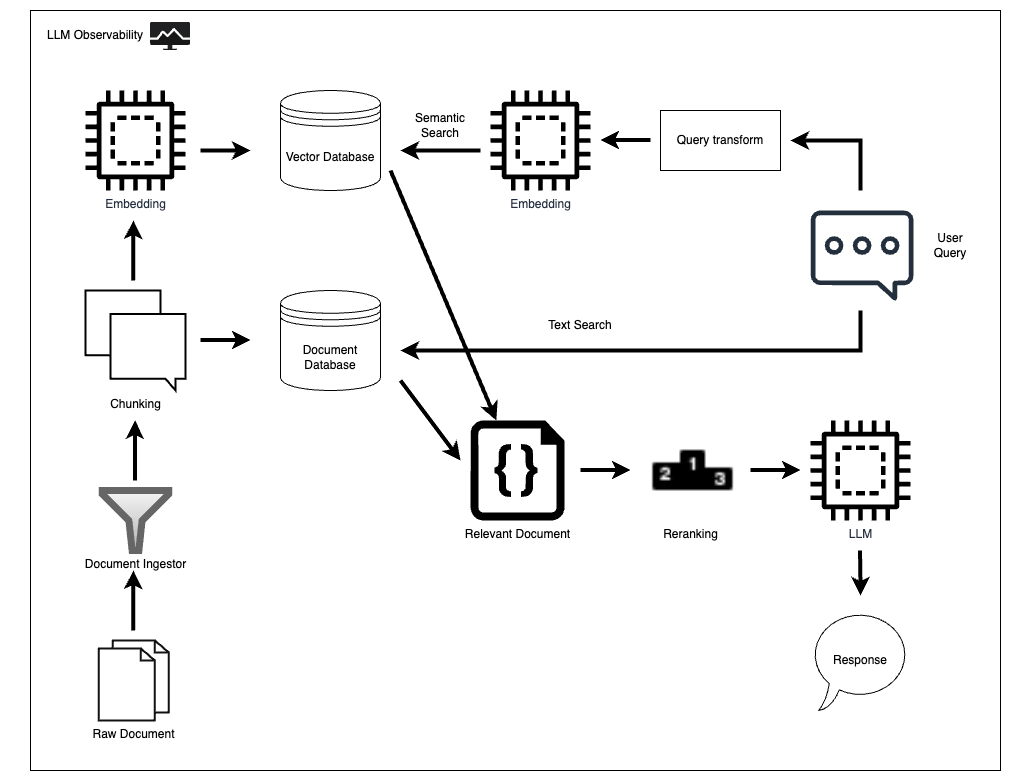
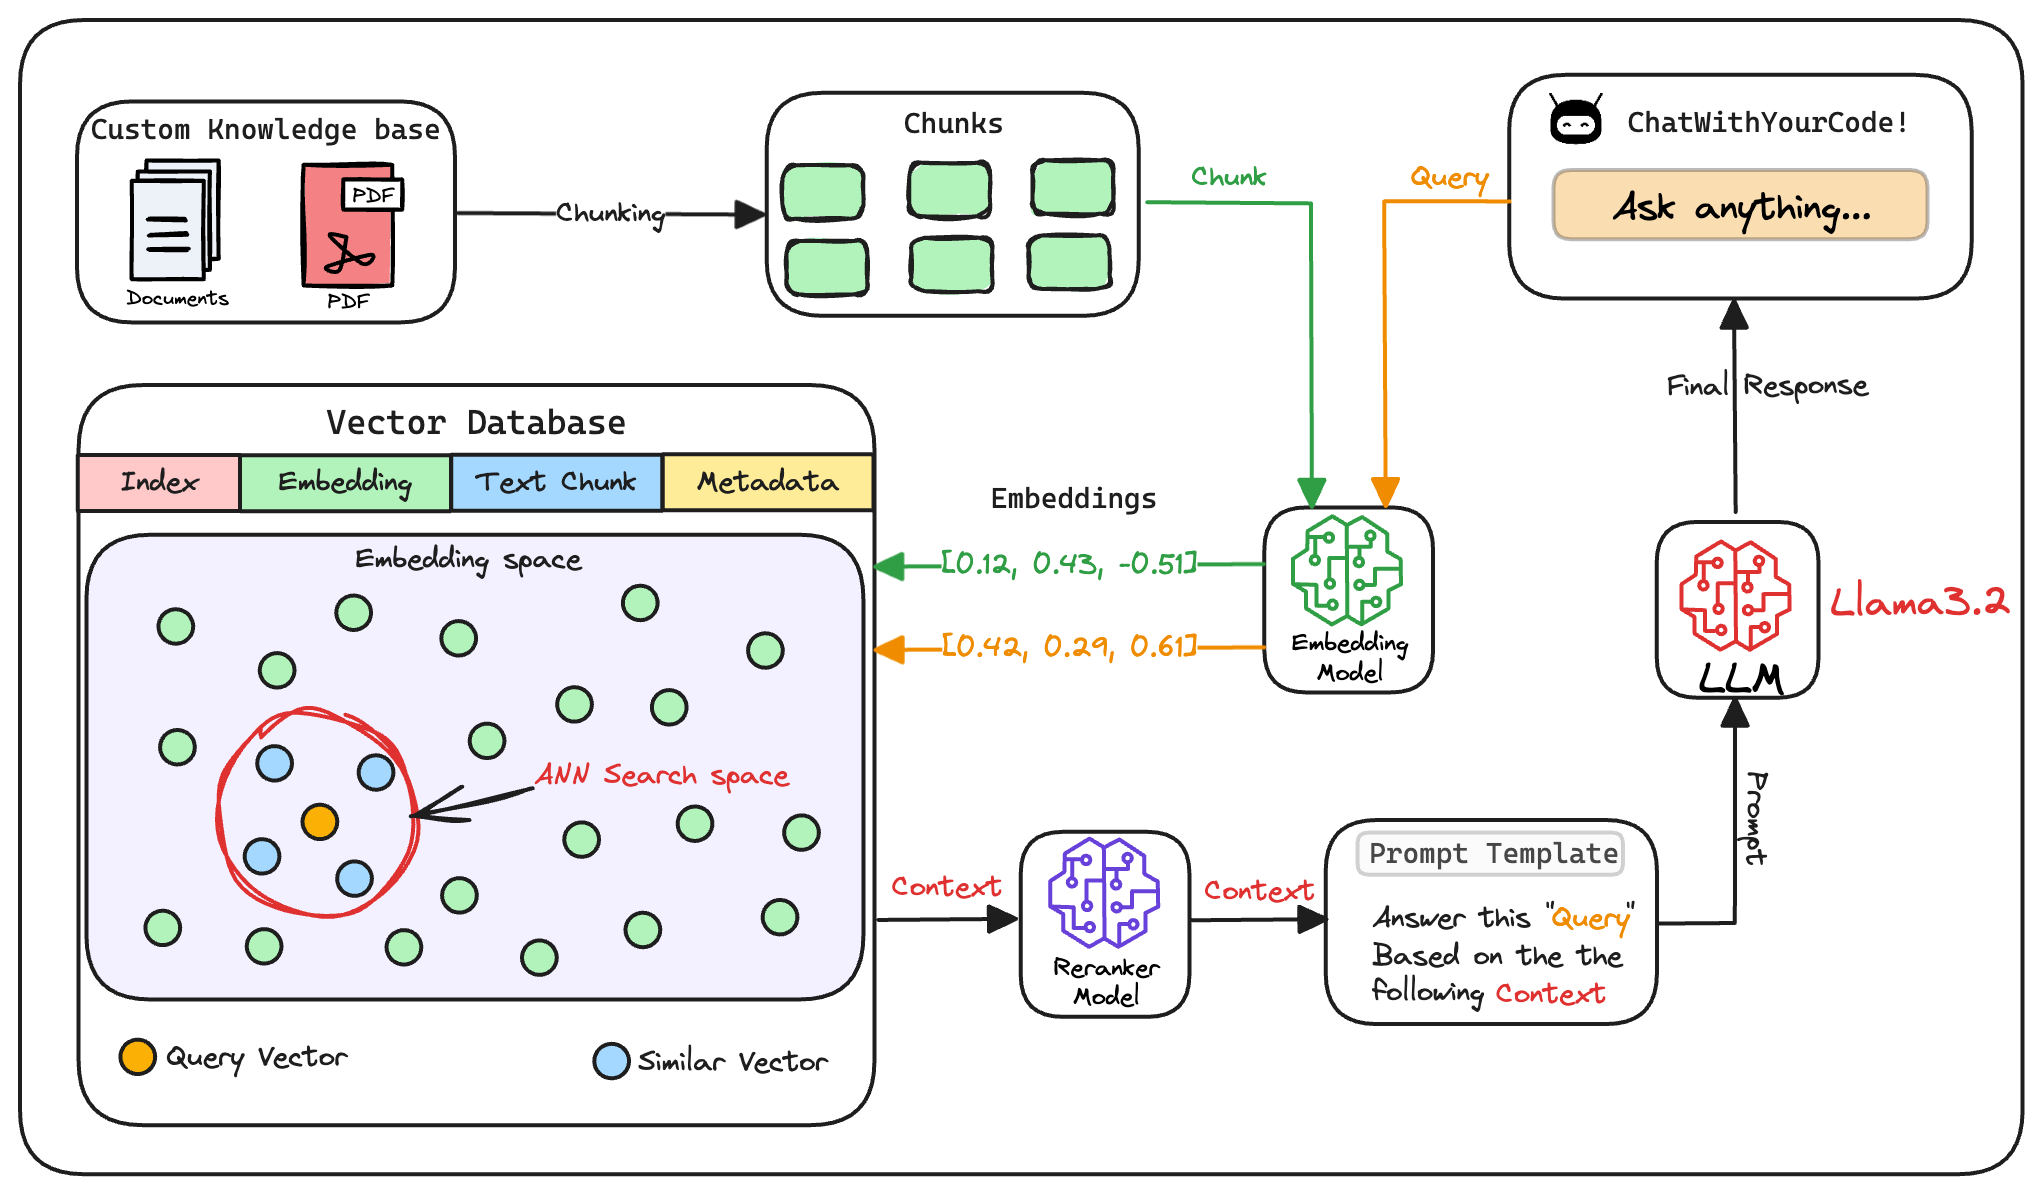

In [ ]:
from llama_index.core.prompts import RichPromptTemplate

template = RichPromptTemplate(
    """
{% chat role="system" %}
Given a list if images and text from each image, please answer the question to the best of your ability.
{% endchat %}

{% chat role="user" %}
{% for image_path, text in images_and_texts %}
Here is some text: {{ text }}
And here is an image:
{{ image_path | image }}
{% endfor %}
{% endchat %}
"""
)

messages = template.format_messages(
    images_and_texts=[
        (
            r"contents\theory\aiml_algorithms\dl_llm\_images\rag_diagram.png",
            "This is the first page of the document",
        ),
        (
            r"contents\theory\aiml_algorithms\dl_llm\_images\rag_flow.png",
            "This is the second page of the document",
        ),
    ]
)
messages


- the `{% chat %}` block is used to format the message as a chat message and set the role
- the `{% for %}` loop is used to iterate over the images_and_texts list that is passed in
- the `{{ image_path | image }}` syntax is used to format the image path as an image content block. Here, `|` is used to apply a "filter" to the variable to **help identify it as an image**.

#### Retriever in Prompt

In [ ]:
from llama_index.core.prompts import RichPromptTemplate

template = RichPromptTemplate(
    """
{% chat role="system" %}
You are a helpful assistant that can answer questions about the context provided.
{% endchat %}

{% chat role="user" %}
{% for node in nodes %}
{{ node.text }}
{% endfor %}
{% endchat %}
"""
)

nodes = retriever.retrieve("What is the capital of the moon?")

messages = template.format_messages(nodes=nodes)


#### Function Mappings

Tính năng `function_mappings` của RichPromptTemplate cho phép bạn chỉ định một hàm Python để tự động xử lý giá trị của một biến placeholder ngay trước khi nó được đưa vào prompt cuối cùng.

In [ ]:
import datetime
from llama_index.core.prompts import RichPromptTemplate


# 1. Hàm để lấy lời chào dựa trên giờ hiện tại
def get_dynamic_greeting(**kwargs) -> str:
    """Trả về lời chào phù hợp với thời gian trong ngày."""
    # Lưu ý: Hàm này không cần dùng kwargs trong ví dụ này,
    # nhưng vẫn cần định nghĩa **kwargs để tương thích với cách RichPromptTemplate gọi nó.
    now = datetime.datetime.now()
    current_hour = now.hour

    if 5 <= current_hour < 12:
        return "Chào buổi sáng!"
    elif 12 <= current_hour < 18:
        return "Chào buổi chiều!"
    else:
        return "Chào buổi tối!"


# 2. Định nghĩa RichPromptTemplate
# Placeholder {{ greeting }} sẽ được điền bằng kết quả của hàm get_dynamic_greeting
# Placeholder {{ user_task }} sẽ được điền bình thường từ input.
template_string = """
{{greeting}} Tôi có thể giúp gì cho bạn hôm nay?

Yêu cầu của bạn: {{user_task}}
"""

# 3. Tạo template và đăng ký function mapping
# Map placeholder "greeting" với hàm get_dynamic_greeting
prompt_tmpl = RichPromptTemplate(
    template_string, function_mappings={"greeting": get_dynamic_greeting}
)

# 4. Sử dụng template
# Chỉ cần cung cấp giá trị cho các placeholder không có function mapping
user_request = "Hãy tóm tắt tin tức mới nhất về AI."
final_prompt_str = prompt_tmpl.format(user_task=user_request)

# In kết quả - bạn sẽ thấy lời chào được tự động thêm vào
print("--- Prompt cuối cùng ---")
print(final_prompt_str)

# Ví dụ kết quả (tùy thuộc vào thời gian bạn chạy code):
# --- Prompt cuối cùng ---
#
# Chào buổi chiều! Tôi có thể giúp gì cho bạn hôm nay?
#
# Yêu cầu của bạn: Hãy tóm tắt tin tức mới nhất về AI.


--- Prompt cuối cùng ---

Chào buổi chiều! Tôi có thể giúp gì cho bạn hôm nay?

Yêu cầu của bạn: Hãy tóm tắt tin tức mới nhất về AI.


#### Partial Formatting

Partially format a prompt, filling in some variables while leaving others to be filled in later.


In [ ]:
from llama_index.core.prompts import RichPromptTemplate

template = RichPromptTemplate(
    """
{{ foo }} {{ bar }}
"""
)

partial_prompt_tmpl = template.partial_format(foo="abc")
print(partial_prompt_tmpl)
fmt_str = partial_prompt_tmpl.format(bar="def")
print(fmt_str)


metadata={} template_vars=['bar', 'foo'] kwargs={'foo': 'abc'} output_parser=None template_var_mappings=None function_mappings=None template_str='\n{{ foo }} {{ bar }}\n'

abc def


#### Complex Prompt

**Tình huống**: Chúng ta muốn tạo một prompt để yêu cầu mô hình ngôn ngữ (LLM) tóm tắt một đoạn văn bản (text). Tuy nhiên, prompt này cần có thêm:

1. **Chỉ dẫn theo đối tượng**: Hướng dẫn LLM cách tóm tắt tùy thuộc vào đối tượng người đọc (audience - ví dụ: "chuyên gia kỹ thuật" hoặc "người mới bắt đầu").
2. **Định dạng Output**: Yêu cầu LLM trả về kết quả dưới dạng JSON chứa bản tóm tắt và ngày tạo.
3. **Thông tin động**: Chèn ngày hiện tại vào yêu cầu định dạng JSON.

In [35]:
import datetime
from llama_index.core.prompts import RichPromptTemplate


# Component 1: Hàm tạo hướng dẫn theo đối tượng
def get_audience_instruction(**kwargs) -> str:
    """Trả về hướng dẫn dựa trên đối tượng."""
    audience = kwargs.get("audience")
    if audience == "chuyên gia kỹ thuật":
        return "Tập trung vào chi tiết kỹ thuật, có thể dùng thuật ngữ chuyên ngành."
    elif audience == "người mới bắt đầu":
        return "Giải thích đơn giản, dễ hiểu, tránh thuật ngữ phức tạp."
    else:
        return "Viết một cách tổng quát."


# Component 2: Hàm tạo yêu cầu định dạng JSON (bao gồm ngày)
def get_json_format_instruction(**kwangs) -> str:
    """Trả về yêu cầu định dạng JSON với ngày hiện tại."""
    current_date = datetime.date.today().isoformat()
    return f"""Yêu cầu định dạng Output:
Trả về kết quả dưới dạng một đối tượng JSON hợp lệ như sau:
{{
  "summary": "<nội dung tóm tắt của bạn ở đây>",
  "generated_date": "{current_date}"
}}
Chỉ trả về đối tượng JSON, không thêm bất kỳ lời giải thích nào khác.
"""


main_structure = """
Hãy tóm tắt đoạn văn bản sau đây:
--- Văn bản bắt đầu ---
{text}
--- Văn bản kết thúc ---

Hướng dẫn tóm tắt:
1. Đối tượng người đọc: {{audience}}. {{audience_instruction}}
2. {{format_instruction}}
"""

prompt_tmpl = RichPromptTemplate(
    main_structure,
    function_mappings={
        "audience_instruction": get_audience_instruction,
        "format_instruction": get_json_format_instruction,
    },
)

my_text = "LlamaIndex là một framework mạnh mẽ giúp xây dựng các ứng dụng dựa trên LLM bằng cách kết nối các nguồn dữ liệu tùy chỉnh với LLM."
audience_type = "người mới bắt đầu"

# Format template, truyền cả biến và hàm
rich_prompt_result = prompt_tmpl.format(
    text=my_text,
    audience=audience_type,
)
print(rich_prompt_result)



Hãy tóm tắt đoạn văn bản sau đây:
--- Văn bản bắt đầu ---
{text}
--- Văn bản kết thúc ---

Hướng dẫn tóm tắt:
1. Đối tượng người đọc: người mới bắt đầu. Giải thích đơn giản, dễ hiểu, tránh thuật ngữ phức tạp.
2. Yêu cầu định dạng Output:
Trả về kết quả dưới dạng một đối tượng JSON hợp lệ như sau:
{
  "summary": "<nội dung tóm tắt của bạn ở đây>",
  "generated_date": "2025-04-11"
}
Chỉ trả về đối tượng JSON, không thêm bất kỳ lời giải thích nào khác.



## Build RAG

**RAG**: Retrieval-Augmented Generation (RAG) là một kỹ thuật trong lĩnh vực xử lý ngôn ngữ tự nhiên (NLP) kết hợp giữa việc truy xuất thông tin và sinh văn bản. Mục tiêu của RAG là cải thiện khả năng sinh văn bản của các mô hình ngôn ngữ bằng cách cung cấp thông tin bổ sung từ các nguồn bên ngoài trong quá trình sinh văn bản.

![](https://docs.llamaindex.ai/en/stable/_static/getting_started/basic_rag.png)

> In RAG, your data is loaded and prepared for queries or "indexed". User queries act on the index, which filters your data down to the most relevant context. This context and your query then go to the LLM along with a prompt, and the LLM provides a response.

---

**RAG pipeline**: Một quy trình RAG bao gồm các stage sau:

![](https://docs.llamaindex.ai/en/stable/_static/getting_started/stages.png)

1. **Loading**: Tải dữ liệu từ các nguồn khác nhau như cơ sở dữ liệu, tệp văn bản, hoặc API. Sử dụng [LlamaHub](https://llamahub.ai/) cung cấp các connector cho các nguồn dữ liệu phổ biến.
2. **Indexing**: Tạo Index từ dữ liệu đã tải để dễ dàng truy xuất thông tin, gần giống như `vector embedding` (vector hoá data dựa trên câu chữ và ngữ nghĩa).
3. **Storing**: Lưu trữ Index + Metadata liên quan trong một cơ sở dữ liệu hoặc một hệ thống lưu trữ để có thể truy xuất sau này.
4. **Querying**: Khi người dùng gửi một truy vấn, hệ thống sẽ tìm kiếm trong Index để tìm các phần dữ liệu liên quan, trong đó gồm sub-queries, multi-step queries và hybrid strategies.
5. **Evaluating**: Đánh giá kết quả truy vấn để đảm bảo rằng nó đáp ứng yêu cầu của người dùng. Điều này có thể bao gồm việc kiểm tra độ chính xác, độ tin cậy và tính liên quan của kết quả.

### Loading & Ingestion

**1. Một số thuật ngữ:**

- **Document**: Một đơn vị dữ liệu cơ bản trong LlamaIndex, có thể là một đoạn văn bản, một tệp tin hoặc một đối tượng dữ liệu khác. Đại diện cho data source.
- **Node**: Một phần tử trong Document (giống như `chunk`), bao gồm data và metadata liên quan. Node có thể được sử dụng để tổ chức và truy xuất thông tin trong Document.
- **Connector**: là Reader cho phép bạn tải dữ liệu từ các nguồn khác nhau, chẳng hạn như cơ sở dữ liệu, tệp tin hoặc API.

**2. Các bước**

- **Load data**: Tải dữ liệu từ các nguồn khác nhau bằng cách sử dụng các connector có sẵn trong LlamaHub hoặc tự định nghĩa connector của riêng bạn.
- **Chunk data**: Chia nhỏ dữ liệu thành các phần tử nhỏ hơn (**nodes**) để dễ dàng xử lý và truy xuất thông tin. Điều này có thể bao gồm việc chia nhỏ văn bản thành các đoạn văn bản ngắn hơn hoặc chia nhỏ tệp tin thành các phần tử nhỏ hơn.
- **Extract metadata**: Trích xuất thông tin bổ sung từ dữ liệu đã tải, chẳng hạn như tiêu đề, tác giả hoặc ngày tháng. Metadata có thể được sử dụng để tổ chức và truy xuất thông tin trong **Document**.
- **Embed data**: Chuyển đổi dữ liệu và metadata thành các vector để dễ dàng truy xuất và xử lý. Điều này có thể bao gồm việc sử dụng các mô hình nhúng (**embedding models**) để chuyển đổi văn bản thành các vector hoặc sử dụng các phương pháp khác để chuyển đổi dữ liệu thành các định dạng có thể xử lý được.

#### Components

##### Document

In [ ]:
# Documents

from llama_index.core import Document
from llama_index.core.schema import MetadataMode

document = Document(
    text="This is a super-customized document",
    metadata={
        "file_name": "super_secret_document.txt",
        "category": "finance",
        "author": "LlamaIndex",
    },
    excluded_llm_metadata_keys=["file_name"],
    metadata_seperator="::",
    metadata_template="{key}=>{value}",
    text_template="Metadata: {metadata_str}\n-----\nContent: {content}",
)

print(
    "The LLM sees this: \n",
    document.get_content(metadata_mode=MetadataMode.LLM),
)
print("**********************************************")
print(
    "The Embedding model sees this: \n",
    document.get_content(metadata_mode=MetadataMode.EMBED),
)


The LLM sees this: 
 Metadata: category=>finance::author=>LlamaIndex
-----
Content: This is a super-customized document
**********************************************
The Embedding model sees this: 
 Metadata: file_name=>super_secret_document.txt::category=>finance::author=>LlamaIndex
-----
Content: This is a super-customized document


##### Node
- **Node** là một phần tử trong Document, bao gồm data và metadata liên quan. Node có thể được sử dụng để tổ chức và truy xuất thông tin trong Document.

In [ ]:
from llama_index.core.node_parser import SentenceSplitter

parser = SentenceSplitter()

nodes = parser.get_nodes_from_documents(documents)
nodes


[TextNode(id_='eb01d439-f7bc-42de-80f2-e7e570335e66', embedding=None, metadata={'page_label': '1', 'file_name': 'c:\\Users\\datkt\\Desktop\\Working\\notebooks\\coding\\learning\\contents\\theory\\aiml_algorithms\\dl_llm\\data\\MediaCentre-FunFacts_EN_1.pdf'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='c:\\Users\\datkt\\Desktop\\Working\\notebooks\\coding\\learning\\contents\\theory\\aiml_algorithms\\dl_llm\\data\\MediaCentre-FunFacts_EN_1.pdf_part_0', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '1', 'file_name': 'c:\\Users\\datkt\\Desktop\\Working\\notebooks\\coding\\learning\\contents\\theory\\aiml_algorithms\\dl_llm\\data\\MediaCentre-FunFacts_EN_1.pdf'}, hash='6f4cef12d13b0a7b4db6f

##### Metadata


In [ ]:
# Document with metadata
from llama_index.core import Document

document = Document(
    text="text",
    metadata={"filename": "<doc_file_name>", "category": "<category>"},
)


In [ ]:
# Manually modify metadata
document.metadata = {"filename": "<doc_file_name>"}


In [ ]:
# When loading from file
from llama_index.core import SimpleDirectoryReader

documents = SimpleDirectoryReader(
    "./contents/theory/aiml_algorithms/dl_llm/data/",
    recursive=True,
    file_metadata=filename_fn,
    filename_as_id=True,
).load_data()


##### Relationships
- **Relationships** là các liên kết giữa các Document và Node trong LlamaIndex. Chúng cho phép bạn tổ chức và truy xuất thông tin trong Document một cách hiệu quả hơn. Các mối quan hệ có thể bao gồm các liên kết giữa các Document khác nhau hoặc giữa các Node trong cùng một Document.

In [ ]:
from llama_index.core.schema import TextNode, NodeRelationship, RelatedNodeInfo

node1 = TextNode(text="<text_chunk>", id_="<node_id>")
node2 = TextNode(text="<text_chunk>", id_="<node_id>")
# set relationships
node1.relationships[NodeRelationship.NEXT] = RelatedNodeInfo(node_id=node2.node_id)
node2.relationships[NodeRelationship.PREVIOUS] = RelatedNodeInfo(node_id=node1.node_id)
nodes = [node1, node2]


#### Loaders

**Data connectors** ingest data from different data sources and format the data into **Document objects**. A **Document** is a collection of data (currently `text`, and in future, `images` and `audio`) and `metadata` about that data.

##### Documents trực tiếp

Tạo **Documents trực tiếp** từ `text` hoặc `metadata`

In [ ]:
from llama_index.core import Document

doc = Document(
    text="This is a sample document text",
    metadata={"filename": "<doc_file_name>", "category": "<category>"},
)
doc


Document(id_='f884e9c4-11b9-40a9-b0b9-6a31cae2333b', embedding=None, metadata={'filename': '<doc_file_name>', 'category': '<category>'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='This is a sample document text', path=None, url=None, mimetype=None), image_resource=None, audio_resource=None, video_resource=None, text_template='{metadata_str}\n\n{content}')

##### SimpleDirectoryReader

- **SimpleDirectoryReader**: Tạo Documents từ một folder/file

The easiest reader which **creates `documents`** out of **every file in a given directory**. It is built in to **LlamaIndex** and can read a variety of formats including `Markdown`, `PDFs`, `Word documents`, `PowerPoint decks`, `images`, `audio` and `video`.

In [ ]:
from llama_index.core import SimpleDirectoryReader


def filename_fn(filename):
    return {"file_name": filename}


documents = SimpleDirectoryReader(
    "./contents/theory/aiml_algorithms/dl_llm/data/",
    recursive=True,
    file_metadata=filename_fn,
    filename_as_id=True,
).load_data()
print(documents[0].get_content())


We may be known as the Great White North, but we’re also green and blue! Did you know Canada 
has more lakes than the rest of the world combined and is home to 10% of the world’s forests? 
Some of its national parks are bigger than entire countries! 
Wild about wildlife: Canada is home to 2.4 million caribou and 15,500 of the world’s 25,000 polar 
bears, not to mention home to 22 different species of whales. 
Canada’s Great Trail, a network of trails stretching across the country from coast-to-coast-to-coast, 
is the longest recreational trail in the world. At 24,000km of land- and water-based trail, it’s longer 
than the Great Wall of China (8,851km).
Canada is made for outdoor adventurers. Did you know you can raft-surf the world’s highest tides 
at the Bay of Fundy, paddle with orcas in British Columbia, track the largest caribou migration in 
Nunavut or kayak past icebergs and humpback whales in Newfoundland and Labrador?
Canada is known as a diverse nation that’s welcoming to immi

In [ ]:
documents[0].metadata


{'page_label': '1',
 'file_name': 'c:\\Users\\datkt\\Desktop\\Working\\notebooks\\coding\\learning\\contents\\theory\\aiml_algorithms\\dl_llm\\data\\MediaCentre-FunFacts_EN_1.pdf'}

##### LlamaParse

**LlamaParse** là LlamaIndex's official tool for PDF parsing, available as a managed API.

See [llamaparse](https://docs.cloud.llamaindex.ai/llamaparse/getting_started) for more details.

**Need for Advanced Parsing:**
- Complex file formats may contain mixed content (e.g., text, images, charts).
- Basic readers may struggle with accurate extraction.

**LlamaParse Features:**
- Leverages LLM intelligence for superior document parsing.
- Supports a variety of formats beyond **PDFs**, including **Word**, **PowerPoint**, and **RTF**.
- Allows instructions for tailored parsing outcomes using the `parsing_instruction` parameter

In [36]:
%pip install -qU llama-cloud-services llama-index-core llama-index-readers-file python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from dotenv import load_dotenv
from llama_cloud_services import LlamaParse
from llama_index.core import SimpleDirectoryReader

import nest_asyncio

nest_asyncio.apply()
load_dotenv("contents/theory/aiml_algorithms/dl_llm/.env")

# set up parser
parser = LlamaParse(
    result_type="markdown"  # "markdown" and "text" are available
)

# use SimpleDirectoryReader to parse our file
file_extractor = {".pdf": parser}
documents = SimpleDirectoryReader(
    input_files=[
        r"contents\theory\aiml_algorithms\dl_llm\data\MediaCentre-FunFacts_EN_1.pdf"
    ],
    file_extractor=file_extractor,
).load_data()
print(documents)


Started parsing the file under job_id 0684932f-38ff-4f36-a74e-a2f9642ee17f
[Document(id_='c68c19f7-a558-4072-ba26-f6b5683d43ab', embedding=None, metadata={'file_path': 'contents\\theory\\aiml_algorithms\\dl_llm\\data\\MediaCentre-FunFacts_EN_1.pdf', 'file_name': 'MediaCentre-FunFacts_EN_1.pdf', 'file_type': 'application/pdf', 'file_size': 335061, 'creation_date': '2025-04-11', 'last_modified_date': '2025-04-11'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='# Fun Facts About Canada\n\nWe may be known as the Great White North, but we’re also green and blue! Did you know Canada has more lakes than the rest of the world combined and is hom

##### LlamaHub

[**LlamaHub**](https://llamahub.ai/?tab=readers): Tạo Documents từ các nguồn dữ liệu bên ngoài như `Google Drive`, `Notion`, `Github`, `Google Search`, `Wikipedia`, `Web pages`, `Database` và more.

- **WikiReader**: Tạo Documents từ Wikipedia

In [ ]:
%pip install -qU llama-index-readers-wikipedia wikipedia
from llama_index.readers.wikipedia import WikipediaReader

loader = WikipediaReader()
documents = loader.load_data(pages=["Pythagorean theorem", "General relativity"])
print(f"loaded {len(documents)} documents")

Note: you may need to restart the kernel to use updated packages.
loaded 2 documents


- **WebReader**: Tạo Documents từ Web pages

In [ ]:
%pip install -qU llama-index-readers-web

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from llama_index.readers.web import BeautifulSoupWebReader

loader = BeautifulSoupWebReader()
documents = loader.load_data(
    urls=[
        "https://pinetree.vn/post/dich-vu/mo-tai-khoan-chung-khoan-khach-hang-ca-nhan/",
    ]
)
print(f"loaded {len(documents)} documents")


loaded 1 documents


- **DatabaseReader**: Tạo Documents từ Database

In [ ]:
%pip install -qU llama-index-readers-database

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from llama_index.core.schema import Document
from llama_index.readers.database import DatabaseReader

# Initialize DatabaseReader with the SQL database connection details
reader = DatabaseReader(
    sql_database="<SQLDatabase Object>",  # Optional: SQLDatabase object
    engine="<SQLAlchemy Engine Object>",  # Optional: SQLAlchemy Engine object
    uri="<Connection URI>",  # Optional: Connection URI
    scheme="<Scheme>",  # Optional: Scheme
    host="<Host>",  # Optional: Host
    port="<Port>",  # Optional: Port
    user="<Username>",  # Optional: Username
    password="<Password>",  # Optional: Password
    dbname="<Database Name>",  # Optional: Database Name
)

# Load data from the database using a query
documents = reader.load_data(
    query="<SQL Query>"  # SQL query parameter to filter tables and rows
)


#### Chunking - Node parser
- **Chunking**: Chia nhỏ dữ liệu thành các phần tử nhỏ hơn (**nodes**) để dễ dàng xử lý và truy xuất thông tin. Điều này có thể bao gồm việc chia nhỏ văn bản thành các đoạn văn bản ngắn hơn hoặc chia nhỏ tệp tin thành các phần tử nhỏ hơn.
- When a document is broken into nodes, all of **it's attributes are inherited to the children nodes** (i.e. metadata, text and metadata templates, etc.)

**Nodes có thể được tạo thông qua:**
- Sử dụng Node parsers trực tiếp với Document
- Sử dụng Node parsers trong **set of transformations** với **Ingestion Pipeline**
- Sử dụng Node parsers trong **set of transformations** với **Indexing Function** (`.from_documents()`)

##### File-Based Node Parsers

Parse nội dung của các tệp tin thành các nodes tuỳ theo định dạng của tệp tin. 

- [**`SimpleFileNodeParser`**](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules/#simplefilenodeparser): automatically use the best node parser for each type of content

In [2]:
!wget -O data/README.md https://raw.githubusercontent.com/py-pdf/sample-files/main/README.md

--2025-04-12 17:09:47--  https://raw.githubusercontent.com/py-pdf/sample-files/main/README.md
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 420 [text/plain]
Saving to: ‘data/README.md’

data/README.md      100%[===================>]     420  --.-KB/s    in 0s      

2025-04-12 17:09:47 (66.8 MB/s) - ‘data/README.md’ saved [420/420]



In [ ]:
from llama_index.core.node_parser import SimpleFileNodeParser
from llama_index.readers.file import FlatReader
from pathlib import Path

md_docs = FlatReader().load_data(Path("data/README.md"))

parser = SimpleFileNodeParser()
md_nodes = parser.get_nodes_from_documents(md_docs)
md_nodes


[TextNode(id_='93391c60-ea11-46f7-a29e-3de205d6bae0', embedding=None, metadata={'filename': 'README.md', 'extension': '.md', 'header_path': '/'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='55e60977-1e1d-4f99-acf6-f06ffe59b12b', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'filename': 'README.md', 'extension': '.md'}, hash='feaa6345809fa80a2cf5f084d79254aa94d2005fe4b8b6b06e95140913bb8348'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='1e42ac0e-9dd0-4c91-8a34-3330cf7037e3', node_type=<ObjectType.TEXT: '1'>, metadata={'filename': 'README.md', 'extension': '.md', 'header_path': '/PDF Sample Files/'}, hash='8caf29cccb16822123226cf7545c57d666333db6cba80a36844d5345d8d7a1f8')}, metadata_template='{key}: {value}', metadata_separator='\n', text='# PDF Sample Files\n\nThis repository provides files for testing software that reads / parses\nPDF files.\n\nThe `files.json` file contains a list o

- [**`HTMLNodeParser`**](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules/#htmlnodeparser): uses `beautifulsoup` to parse **raw HTML** by a select subset of HTML tags (default: `["p", "h1", "h2", "h3", "h4", "h5", "h6", "li", "b", "i", "u", "section"]`)

In [ ]:
from llama_index.core.node_parser import HTMLNodeParser
from llama_index.readers.web import BeautifulSoupWebReader
import requests
from llama_index.core import Document

# Fetch HTML content from a URL
url = "https://pinetree.vn/post/dich-vu/mo-tai-khoan-chung-khoan-khach-hang-ca-nhan/"
response = requests.get(url)
if response.status_code == 200:
    html_docs = [Document(text=response.text)]
else:
    raise Exception(f"Failed to fetch the URL: {url}")

# Parse HTML documents
parser = HTMLNodeParser(
    # tags=["p", "h1"] # optional list of tags
)
nodes = parser.get_nodes_from_documents(html_docs)
nodes


[TextNode(id_='e4b1a808-6241-44d6-abfc-e5cdf9b124b8', embedding=None, metadata={'tag': 'li'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='79c25a8f-865a-4247-92cf-59a9d7f3b73b', node_type=<ObjectType.DOCUMENT: '4'>, metadata={}, hash='541e29fb9c2075696bd0c1aef74f134ea40ab28a8d463ea4ec8200dd362b6adf'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='3aa30a48-659a-4184-9293-2aadd65b51ca', node_type=<ObjectType.TEXT: '1'>, metadata={'tag': 'i'}, hash='670fa8a9d1bc2a07f6268f58dfbe014d893b39e621ac84ef2ec9d2034786cd31')}, metadata_template='{key}: {value}', metadata_separator='\n', text='Dịch vụ và nền tảng\nDịch vụCổ phiếu\nTrái phiếu\nPineFolio\nPhái sinh\nTư vấn tài chính doanh nghiệp\nChương trình phát triển Khách hàng\n\n\nNền tảng giao dịchAlphaTrading\nWebTrading\nPineX\nStock123\nMobile Webview\nEliteTrade\nDịch vụ\nCổ phiếu\nTrái phiếu\nPineFolio\nPhái sinh\nTư vấn tài chính doanh nghiệ

- `JSONNodeParser` parses raw JSON.


In [ ]:
from llama_index.core.node_parser import JSONNodeParser

parser = JSONNodeParser()

nodes = parser.get_nodes_from_documents(json_docs)


- `MarkdownNodeParser` parses raw markdown text.

In [ ]:
from llama_index.core.node_parser import MarkdownNodeParser

parser = MarkdownNodeParser()

nodes = parser.get_nodes_from_documents(markdown_docs)


##### Text-Based Node Parsers

1. [**`CodeSplitter`**](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules/#codesplitter): Splits raw code-text based on the language it is written in.
   - `language`: This specifies the language of the code
   - `chunk_lines`: This defines the number of lines per chunk
   - `chunk_lines_overlap`: This defines the lines overlap between chunks
   - `max_chars`: This defines the maximum characters per chunk
---
2. [**`LangchainNodeParser`**](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules/#langchainnodeparser): Wrap any existing text splitter from **langchain** with a node parser.
---
3. [**`SentenceSplitter`**](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules/#sentencesplitter): Phân chia text trong khi giữ lại các câu hoàn chỉnh. 
---
4. [**`SentenceWindowNodeParser`**](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules/#langchainnodeparser): Phân chia văn bản thành các câu có số lượng câu nhất định
   - `Window_size`: This defines the number of sentences on each side to include in the window
   - `window_metadata_key`: This defines the metadata key for the window sentences
   - `original_text_metadata_key`: This defines the metadata key for the original sentence 
---
5. [**`SemanticSplitterNodeParser`**](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules/#langchainnodeparser): Phân chia giữa các câu đảm bảo các câu cùng mang ý nghĩa tương tự được nhóm lại với nhau.
---
6. [**`TokenTextSplitter`**](https://docs.llamaindex.ai/en/stable/module_guides/loading/node_parsers/modules/#tokentextsplitter): Phân chia văn bản thành các đoạn văn bản nhỏ hơn dựa trên số lượng token.
   - `chunk_size`: This sets the maximum number of tokens for each chunk
   - `chunk_overlap`: This defines the overlap in tokens between consecutive chunks
   - `separator`: This is used to determine the primary token boundary
   - `backup_separators`: These can be used for additional splitting points if the primary separator doesn’t split the text sufficiently

In [ ]:
from llama_index.core.node_parser import CodeSplitter

splitter = CodeSplitter(
    language="python",
    chunk_lines=40,  # lines per chunk
    chunk_lines_overlap=15,  # lines overlap between chunks
    max_chars=1500,  # max chars per chunk
)
nodes = splitter.get_nodes_from_documents(documents)


#### Metadata Extraction

##### Built-in Metadata Extractors

Use **LLMs to automate metadata extraction** with our **Metadata Extractor** modules, following "feature extractors":

- `SummaryExtractor` - automatically extracts a summary over a set of Nodes
- `QuestionsAnsweredExtractor` - extracts a set of questions that each Node can answer
- `TitleExtractor` - extracts a title over the context of each Node
- `EntityExtractor` - extracts entities (i.e. names of places, people, things) mentioned in the content of each Node

In [ ]:
from llama_index.extractors.entity import EntityExtractor
from llama_index.core.node_parser import SentenceSplitter

entity_extractor = EntityExtractor(
    prediction_threshold=0.5,
    label_entities=False,  # include the entity label in the metadata (can be erroneous)
    device="cpu",  # set to "cuda" if you have a GPU
)


##### Pydantic Extractor

Sử dụng [**Pydantic Extractor**](https://docs.llamaindex.ai/en/stable/examples/metadata_extraction/PydanticExtractor/) để tự động trích xuất metadata từ các Node trong Document. Pydantic Extractor cho phép bạn định nghĩa một mô hình Pydantic và sử dụng nó để trích xuất metadata từ các Node trong Document.

Example guide: [Pydantic Extractor](https://docs.llamaindex.ai/en/stable/examples/cookbooks/oreilly_course_cookbooks/Module-4/Metadata_Extraction/)

In [ ]:
from json import load
from pydantic import BaseModel, Field
from dotenv import load_dotenv

load_dotenv(r"contents/theory/aiml_algorithms/dl_llm/.env")


# Define the metadata model for the node
class NodeMetadata(BaseModel):
    """Node metadata."""

    entities: list[str] = Field(..., description="Unique entities in this text chunk.")
    summary: str = Field(..., description="A concise summary of this text chunk.")
    contains_number: bool = Field(
        ...,
        description=(
            "Whether the text chunk contains any numbers (ints, floats, etc.)"
        ),
    )


In [ ]:
# Setup the Extractor
from llama_index.program.openai import OpenAIPydanticProgram
from llama_index.core.extractors import PydanticProgramExtractor
from llama_index.llms.openai import OpenAI

EXTRACT_TEMPLATE_STR = """\
Here is the content of the section:
----------------
{context_str}
----------------
Given the contextual information, extract out a {class_name} object.\
"""

openai_program = OpenAIPydanticProgram.from_defaults(
    llm=OpenAI(model="gpt-4o-mini"),
    output_cls=NodeMetadata,
    prompt_template_str="{input}",
    extract_template_str=EXTRACT_TEMPLATE_STR,
)

metadata_extractor = PydanticProgramExtractor(
    program=openai_program, input_key="input", show_progress=True
)


In [8]:
%pip install -qU llama-index llama-index-readers-web

Note: you may need to restart the kernel to use updated packages.


In [11]:
# load in blog
from llama_index.readers.web import SimpleWebPageReader

reader = SimpleWebPageReader(html_to_text=True)
docs = reader.load_data(urls=["https://eugeneyan.com/writing/llm-patterns/"])


In [12]:
from llama_index.core.node_parser import SentenceSplitter

node_parser = SentenceSplitter(chunk_size=1024)


In [ ]:
from llama_index.core.ingestion import IngestionPipeline
import nest_asyncio

nest_asyncio.apply()

pipeline = IngestionPipeline(transformations=[node_parser, metadata_extractor])

orig_nodes = pipeline.run(documents=docs)
orig_nodes


Retrying llama_index.llms.openai.base.OpenAI._achat in 1.0 seconds as it raised RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o-mini in organization org-Zd8Ruhyaj6mEeTaL17nSgLJZ on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing.', 'type': 'requests', 'param': None, 'code': 'rate_limit_exceeded'}}.
Retrying llama_index.llms.openai.base.OpenAI._achat in 1.0 seconds as it raised RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o-mini in organization org-Zd8Ruhyaj6mEeTaL17nSgLJZ on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your ac

#### Ingestion Pipeline

**Ingestion Pipeline** là một chuỗi các bước xử lý dữ liệu (`Transformations`) được apply vào loaded data để chuẩn bị cho việc indexing và querying. Kết quả trả về có thể là **Nodes** (sau khi được transformed) hoặc **Indexes** (sau khi được transformed và inserted vào Vector Database)

In [ ]:
# Create IngestionPipeline with multiple transformations

from os import wait
from llama_index.core.extractors import (
    TitleExtractor,
    QuestionsAnsweredExtractor,
)
from llama_index.core.node_parser import TokenTextSplitter
from llama_index.llms.openai import OpenAIEmbedding
from llama_index.core.ingestion import IngestionPipeline
import qdrant_client


# define our pipeline
text_splitter = TokenTextSplitter(separator=" ", chunk_size=512, chunk_overlap=128)
title_extractor = TitleExtractor(nodes=5)
qa_extractor = QuestionsAnsweredExtractor(questions=3)
embedding_model = OpenAIEmbedding()  # need stage if using a vector store

# define our vector store
client = qdrant_client.QdrantClient(location=":memory:")
vector_store = QdrantVectorStore(client=client, collection_name="test_store")


pipeline = IngestionPipeline(
    transformations=[
        text_splitter,
        title_extractor,
        qa_extractor,
        embedding_model,
    ],
    vector_store=vector_store,  # optional
)

nodes = pipeline.run(
    documents=documents,
    in_place=True,
    show_progress=True,
    num_workers=4,  # Set it if run in parallel
)

# nodes = wait pipeline.arun(documents=documents) # async version


Parsing nodes:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:03<00:00,  2.74it/s]


In [ ]:
nodes


[TextNode(id_='db68033c-8416-43aa-a0b6-6aac294e407a', embedding=None, metadata={'page_label': '1', 'file_name': 'c:\\Users\\datkt\\Desktop\\Working\\notebooks\\coding\\learning\\contents\\theory\\aiml_algorithms\\dl_llm\\data\\MediaCentre-FunFacts_EN_1.pdf', 'document_title': 'Canada: The Great White North, Green and Blue Wonderland', 'questions_this_excerpt_can_answer': "1. How many caribou are estimated to be living in Canada?\n2. What is the length of Canada's Great Trail, and how does it compare to the Great Wall of China?\n3. What is the postal code for Santa's address in Canada, and why is it significant?"}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='c:\\Users\\datkt\\Desktop\\Working\\notebooks\

In [ ]:
# OR create in INDEXING PIPELINE
from llama_index.core import VectorStoreIndex

index = VectorStoreIndex.from_documents(
    documents, transformations=[text_splitter, title_extractor, qa_extractor]
)


100%|██████████| 9/9 [00:03<00:00,  2.29it/s]


##### Caching

**Caching** (lưu trữ tạm) trong IngestionPipeline của LlamaIndex là một cơ chế để **lưu lại kết quả** của việc áp dụng một biến đổi (transformation) cụ thể lên một nút (node) dữ liệu cụ thể, giúp tiết kiệm thời gian và chi phí khi chạy pipeline nhiều lần hoặc với dữ liệu không thay đổi.

**Cách hoạt động của caching:**

1. **Tạo Hash (Băm):** Khi một nút dữ liệu (có thể là tài liệu gốc hoặc kết quả từ bước trước đó) được xử lý bởi một bước biến đổi (transformation), LlamaIndex sẽ tạo ra một giá trị định danh duy nhất (gọi là hash) dựa trên nội dung của nút đó _và_ cấu hình của bước biến đổi đó.
2. **Kiểm tra Cache:** Trước khi thực sự thực hiện biến đổi, pipeline sẽ kiểm tra xem trong bộ nhớ cache đã có kết quả nào ứng với giá trị hash này chưa.
3. **Sử dụng Cache (Cache Hit):** Nếu đã có kết quả trong cache (cache hit), pipeline sẽ lấy luôn kết quả đó và chuyển sang bước tiếp theo mà _không cần_ thực hiện lại việc biến đổi.
4. **Thực hiện và Lưu Cache (Cache Miss):** Nếu chưa có kết quả trong cache (cache miss), pipeline sẽ thực hiện bước biến đổi đó, sau đó lưu kết quả vào cache cùng với giá trị hash tương ứng, rồi mới sử dụng kết quả đó cho bước tiếp theo.

**Lợi ích chính:**

- **Tiết kiệm thời gian:** Quan trọng nhất, caching giúp tiết kiệm đáng kể thời gian xử lý, đặc biệt khi bạn chạy pipeline nhiều lần với cùng một dữ liệu đầu vào hoặc khi chỉ có một phần nhỏ dữ liệu thay đổi. Pipeline sẽ bỏ qua các bước đã được thực hiện và lưu cache trước đó.
- **Tiết kiệm chi phí:** Nếu các bước biến đổi có sử dụng API tốn phí (như `OpenAIEmbedding`), caching giúp tránh gọi lại các API này cho cùng một dữ liệu, từ đó giảm chi phí.

**Quản lý Cache:**

Có hai cách quản lý cache:

1. **Local Cache Management (Quản lý Cache Cục bộ):**
    - Cache được lưu trữ trên máy cục bộ (có thể trong bộ nhớ hoặc file).
    - Bạn có thể lưu cache ra đĩa để sử dụng sau (`pipeline.persist("./pipeline_storage")`).
    - Bạn có thể tải lại cache đã lưu (`new_pipeline.load("./pipeline_storage")`).
    - Bạn có thể xóa toàn bộ nội dung cache nếu nó quá lớn (`cache.clear()`).
2. **Remote Cache Management (Quản lý Cache Từ xa):**
    - Cache được lưu trữ trên các hệ thống bên ngoài như Redis, MongoDB, Firestore.
    - Tiện lợi khi chạy pipeline trên nhiều máy hoặc muốn chia sẻ cache.
    - Không cần bước `persist` riêng vì dữ liệu được lưu vào hệ thống từ xa ngay khi được tạo ra.
    - Cần cấu hình kết nối đến hệ thống lưu trữ (ví dụ: `RedisCache.from_host_and_port(...)`).

**Các trường hợp cần sử dụng caching:**

- **Phát triển và Gỡ lỗi (Development & Debugging):** 

    Khi bạn đang xây dựng hoặc tinh chỉnh pipeline, bạn sẽ phải chạy đi chạy lại rất nhiều lần để kiểm tra. Có thể bạn chỉ thay đổi một tham số nhỏ trong một bước biến đổi (ví dụ: `chunk_size` từ 25 thành 50), hoặc thêm/bớt một bước.

    **->** Thay vì phải xử lý lại _toàn bộ_ dữ liệu từ đầu chỉ vì một thay đổi nhỏ, cache cho phép pipeline bỏ qua tất cả các bước _không thay đổi_ cho những dữ liệu _không thay đổi_. Nó chỉ tính toán lại những phần bị ảnh hưởng bởi sự thay đổi của bạn. Điều này tăng tốc độ chu kỳ phát triển lên rất nhiều.

- **Cập nhật Dữ liệu Tăng cường (Incremental Updates):** 

    Hệ thống của bạn thường xuyên có dữ liệu mới (ví dụ: bài viết blog mới, tài liệu mới, sản phẩm mới). Bạn cần chạy pipeline để xử lý những dữ liệu _mới_ này 
    
    **->** Mặc dù mục tiêu chính là xử lý dữ liệu mới, nhưng khi bạn gọi `pipeline.run()`, có thể bạn cung cấp một tập hợp chứa cả dữ liệu cũ và mới, hoặc pipeline được thiết kế để quét qua toàn bộ nguồn dữ liệu. Cache đảm bảo rằng những tài liệu cũ, không thay đổi sẽ không bị xử lý lại một cách không cần thiết, giúp việc cập nhật nhanh hơn và chỉ tập trung vào phần dữ liệu mới.

- **Thay đổi Cấu hình Pipeline (Pipeline Configuration Changes):**

    Sau một thời gian, bạn có thể quyết định thay đổi cách xử lý dữ liệu. Ví dụ: đổi sang một mô hình embedding tốt hơn, thay đổi chiến lược tách câu, hoặc thêm một bước trích xuất metadata mới

    **->** Khi bạn chạy lại pipeline với cấu hình mới này trên toàn bộ dữ liệu, cache vẫn phát huy tác dụng cho những bước _không_ bị thay đổi. Ví dụ, nếu bạn chỉ thay đổi mô hình embedding ở cuối pipeline, các bước như tách câu, trích xuất tiêu đề (nếu có) đã được cache trước đó sẽ được bỏ qua, tiết kiệm thời gian đáng kể.

- **Lỗi và Khôi phục (Failures and Recovery):** 

    Một pipeline xử lý lượng lớn dữ liệu có thể chạy trong thời gian dài và có thể bị lỗi giữa chừng (do hết bộ nhớ, lỗi mạng khi gọi API, v.v.)

    **->** Khi bạn khởi động lại pipeline sau lỗi, cache giúp nó "nhớ" được những phần công việc đã hoàn thành và được lưu lại. Pipeline có thể nhanh chóng bỏ qua các bước đã cache và tiếp tục từ điểm gần nhất trước khi xảy ra lỗi, thay vì phải bắt đầu lại từ đầu **(Đặc biệt là Remote Cache)**.
    
- **Tái sử dụng và Chạy song song (Reusability and Parallel Runs):** 

    Bạn có thể muốn tái sử dụng một phần của pipeline cho các mục đích khác nhau, hoặc chạy nhiều phiên bản pipeline song song

    **->:** Một bộ cache chung (như Redis) cho phép các tiến trình hoặc worker khác nhau chia sẻ kết quả. Nếu hai worker tình cờ cùng xử lý một đoạn dữ liệu giống nhau ở một bước nào đó, chỉ một worker cần thực hiện tính toán, worker còn lại có thể lấy kết quả từ cache.

In [ ]:
# Local Cache Management

# save pipeline cache in local storage
pipeline.persist("./pipeline_storage")

# load and restore state (new pipeline)
new_pipeline = IngestionPipeline(
    transformations=[
        SentenceSplitter(chunk_size=25, chunk_overlap=0),
        TitleExtractor(),
    ],
)
# load the pipeline state from local cache
new_pipeline.load("./pipeline_storage")

# will run instantly due to the cache
nodes = pipeline.run(documents=[Document.example()])


In [ ]:
# Remote Cache Management: RedisCache, MongoDBCache, FirestoreCache

from llama_index.core import Document
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core.extractors import TitleExtractor
from llama_index.core.ingestion import IngestionPipeline, IngestionCache
from llama_index.storage.kvstore.redis import RedisKVStore as RedisCache


ingest_cache = IngestionCache(
    cache=RedisCache.from_host_and_port(host="127.0.0.1", port=6379),
    collection="my_test_cache",
)

pipeline = IngestionPipeline(
    transformations=[
        SentenceSplitter(chunk_size=25, chunk_overlap=0),
        TitleExtractor(),
        OpenAIEmbedding(),
    ],
    cache=ingest_cache,
)

# Ingest directly into a vector db
nodes = pipeline.run(documents=[Document.example()])


In [ ]:
# delete all context of the cache If the cache becomes too large
ingest_cache.clear()


### Indexing & Embedding

- **Indexes**: Khi data được ingested, nó sẽ được chuyển đổi thành 1 structure data được gọi là **Indexes** (bao gồm data được vector embedding + metadata) để dễ dàng retrieve và query, được lưu trữ trong một cơ sở dữ liệu vector (vector store) và được design để tối ưu hóa cho việc truy vấn và tìm kiếm thông tin.

- **Nodes (Nút):**
    
    - **Miêu tả:** Trong LlamaIndex, một `Node` cơ bản là một chunk văn bản được trích ra từ một `Document` gốc lớn hơn. Khi bạn đưa các đối tượng `Document` vào LlamaIndex, nó sẽ tự động thực hiện việc phân tích và chia nhỏ các tài liệu đó thành các `Node`. Mỗi `Node` không chỉ chứa đoạn văn bản mà còn có thể chứa metadata quan trọng như ID của `Document` gốc, mối quan hệ với các Node khác, v.v. Việc chia nhỏ này giúp xử lý các tài liệu lớn dễ dàng hơn, đặc biệt là khi đưa vào LLM vốn có giới hạn về ngữ cảnh (context window).
    - **Vai trò:** Nodes là đơn vị cơ bản mà các Index lưu trữ và quản lý. Khi bạn truy vấn, Index sẽ tìm và trả về các Nodes phù hợp nhất.
    
- **Response Synthesis (Tổng hợp Phản hồi):**
    
    - **Miêu tả:** Đây là một module có nhiệm vụ nhận các `Node` đã được truy xuất từ một **Index** (dựa trên câu truy vấn của user) và tạo ra một câu trả lời cuối cùng, mạch lạc và tự nhiên cho người dùng. Module này thường sử dụng một LLM để thực hiện việc tổng hợp này.
    - **Vai trò:** Sau khi Index đã tìm ra các Nodes liên quan nhất đến câu hỏi, `Response Synthesis` sẽ "lắp ráp" các mảnh đó lại, có thể là tóm tắt, trích xuất thông tin cụ thể, hoặc kết hợp chúng để đưa ra câu trả lời hoàn chỉnh. LlamaIndex cung cấp nhiều "chế độ phản hồi" (response modes) khác nhau để kiểm soát cách LLM sử dụng các Node được truy xuất (ví dụ: tóm tắt lần lượt, xây dựng câu trả lời dựa trên tất cả các node cùng lúc, v.v.).
    - Check [Response Mode](#reponse-mode) để biết thêm chi tiết.

- [**Module Guides**](https://docs.llamaindex.ai/en/stable/module_guides/indexing/modules/#module-guides "Permanent link")
  - [Vector Store Index](https://docs.llamaindex.ai/en/stable/module_guides/indexing/vector_store_index/)
  - [Summary Index](https://docs.llamaindex.ai/en/stable/module_guides/indexing/index_guide/)
  - [Tree Index](https://docs.llamaindex.ai/en/stable/module_guides/indexing/index_guide/)
  - [Keyword Table Index](https://docs.llamaindex.ai/en/stable/module_guides/indexing/index_guide/)
  - [Knowledge Graph Index](https://docs.llamaindex.ai/en/stable/examples/index_structs/knowledge_graph/KnowledgeGraphDemo/)
  - [Knowledge Graph Query Engine](https://docs.llamaindex.ai/en/stable/examples/query_engine/knowledge_graph_query_engine/)
  - [Knoweldge Graph RAG Query Engine](https://docs.llamaindex.ai/en/stable/examples/query_engine/knowledge_graph_rag_query_engine/)
  - [REBEL + Knowledge Graph Index](https://colab.research.google.com/drive/1G6pcR0pXvSkdMQlAK_P-IrYgo-_staxd?usp=sharing)
  - [REBEL + Wikipedia Filtering](https://docs.llamaindex.ai/en/stable/examples/index_structs/knowledge_graph/knowledge_graph2/)
  - [SQL Query Engine](https://docs.llamaindex.ai/en/stable/examples/index_structs/struct_indices/SQLIndexDemo/)
  - [DuckDB Query Engine](https://docs.llamaindex.ai/en/stable/examples/index_structs/struct_indices/duckdb_sql_query/)
  - [Document Summary Index](https://docs.llamaindex.ai/en/stable/examples/index_structs/doc_summary/DocSummary/)
  - [Object Index](https://docs.llamaindex.ai/en/stable/examples/objects/object_index/)



#### SummaryIndex
<div style="display:flex;">
<img src="https://docs.llamaindex.ai/en/stable/_static/indices/list.png" alt="Image1" style="width:45%; float:left; margin-right:5%;" />

<img src="https://docs.llamaindex.ai/en/stable/_static/indices/list_filter_query.png" alt="Image2" style="width:45%; float:left;" />
</div>

- **Miêu tả:** Đây là loại Index đơn giản nhất. Nó lưu trữ các Nodes theo tuần tự, giống như một danh sách. Nó phù hợp cho việc tóm tắt _toàn bộ_ nội dung của các tài liệu hoặc trả lời các câu hỏi yêu cầu xem xét tổng thể tất cả thông tin.
- **Khi truy vấn (Query):** Thường thì Index này sẽ tải _tất cả_ các Nodes (hoặc một phần lớn nếu cấu hình) vào cửa sổ ngữ cảnh của LLM và yêu cầu LLM tổng hợp câu trả lời dựa trên toàn bộ thông tin đó. Cách này có thể **không hiệu quả với lượng dữ liệu lớn** do giới hạn ngữ cảnh và chi phí LLM. Thường dùng với `response_mode="tree_summarize"` để xử lý nhiều nodes hiệu quả hơn.


In [ ]:
from llama_index.core import SummaryIndex
from llama_index.core import Document
from llama_index.llms.openai import OpenAI

# Load documents
docs = [
    Document(
        text="This is a sample document text",
        metadata={"filename": "sample.txt"},
    ),
    Document(
        text="This is another sample document text",
        metadata={"filename": "sample2.txt"},
    ),
]
# Create a SummaryIndex from the documents
index = SummaryIndex.from_documents(docs)
# Query the index
query_engine = index.as_query_engine(llm=OpenAI(model="gpt-4o-mini"))
response = query_engine.query("What is the sample document text?")
print(response)


The sample document text is "This is a sample document text."



#### DocumentSummaryIndex




- **Miêu tả:** Được thiết kế đặc biệt để xử lý các bộ sưu tập tài liệu rất lớn. Index này tạo ra một bản tóm tắt cho _mỗi_ tài liệu (hoặc nhóm tài liệu) trước, sau đó xây dựng một index khác (thường là VectorStoreIndex) _trên các bản tóm tắt này_.
- **Khi truy vấn (Query):** Đầu tiên, truy vấn sẽ tìm kiếm các _bản tóm tắt_ phù hợp nhất. Sau đó, dựa trên các bản tóm tắt được chọn, nó có thể tùy chọn truy xuất các Nodes gốc tương ứng nếu cần thêm chi tiết. Cuối cùng, Response Synthesis sẽ tạo câu trả lời dựa trên các bản tóm tắt (và có thể cả Nodes gốc). Rất hiệu quả cho các câu hỏi về nội dung tổng quan của nhiều tài liệu.


In [ ]:
from llama_index.core import SimpleDirectoryReader, get_response_synthesizer
from llama_index.core import DocumentSummaryIndex
from llama_index.llms.openai import OpenAI
from llama_index.core.node_parser import SentenceSplitter

chatgpt = OpenAI(
    model="gpt-4o-mini",
    temperature=0.2,
    max_tokens=50,
    additional_kwargs={"seed": 12345678, "top_p": 0.5},
)

# default mode of building the index
splitter = SentenceSplitter(chunk_size=1024)
response_synthesizer = get_response_synthesizer(
    llm=chatgpt, response_mode="tree_summarize", use_async=True
)
doc_summary_index = DocumentSummaryIndex.from_documents(
    docs,
    llm=chatgpt,
    transformations=[splitter],
    response_synthesizer=response_synthesizer,
    show_progress=True,
)



#### VectorStoreIndex
 
<div style="display:flex;">
<img src="https://docs.llamaindex.ai/en/stable/_static/indices/vector_store.png" alt="Image1" style="width:45%; float:left; margin-right:5%;" />

<img src="https://docs.llamaindex.ai/en/stable/_static/indices/vector_store_query.png" alt="Image2" style="width:45%; float:left;" />
</div>

- **Miêu tả:** Đây là loại Index phổ biến và mạnh mẽ nhất. Mỗi Node được chuyển đổi thành một vector số học (embedding) bằng một mô hình embedding. Các vector này được lưu trữ trong một cơ sở dữ liệu vector (vector store). Các Nodes có nội dung ngữ nghĩa tương tự nhau sẽ có vector nằm gần nhau trong không gian vector.
- **Khi truy vấn (Query):** Câu truy vấn của người dùng cũng được chuyển đổi thành một vector embedding. Index sẽ tìm kiếm trong vector store để xác định các Nodes có vector gần nhất (tương tự nhất về ngữ nghĩa) với vector của câu truy vấn (thường dùng thuật toán như cosine similarity, k-nearest neighbors - KNN). Các Nodes liên quan nhất này (top-k) sau đó được đưa vào Response Synthesis để tạo câu trả lời. Rất tốt cho tìm kiếm ngữ nghĩa (semantic search) và trả lời câu hỏi dựa trên sự liên quan về ý nghĩa.
- **Top-k**: Số lượng nodes được truy xuất từ vector store. Thường dùng `top_k=3` hoặc `top_k=5` để đảm bảo độ chính xác và hiệu suất tốt nhất.


High-level

In [ ]:
from llama_index.core import VectorStoreIndex

index = VectorStoreIndex.from_documents(documents)
# or
index = VectorStoreIndex(nodes)


Low-level

In [ ]:
from llama_index.core import Document
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core.extractors import TitleExtractor
from llama_index.core.ingestion import IngestionPipeline, IngestionCache
import pinecone
from llama_index import VectorStoreIndex, SimpleDirectoryReader, StorageContext
from llama_index.vector_stores import PineconeVectorStore
import nest_asyncio

nest_asyncio.apply()
doc = Document.example()

# create the pipeline with transformations
pipeline = IngestionPipeline(
    transformations=[
        SentenceSplitter(chunk_size=100, chunk_overlap=0),
        TitleExtractor(),
        OpenAIEmbedding(model="text-embedding-3-small"),
    ]
)

# run the pipeline
nodes = pipeline.run(documents=[doc])


100%|██████████| 4/4 [00:01<00:00,  2.55it/s]


In [ ]:
# Initialize Pinecone vector store
pinecone.init(
    api_key="your-api-key",  # replace with your Pinecone API key
    environment="your-environment",  # replace with your Pinecone environment
)

# Create or get an existing index
index_name = "llamaindex-demo"
if index_name not in pinecone.list_indexes():
    pinecone.create_index(
        name=index_name,
        dimension=1536,  # OpenAI embedding dimension
        metric="cosine",
    )

# Initialize the Pinecone vector store
pinecone_index = pinecone.Index(index_name)
vector_store = PineconeVectorStore(pinecone_index=pinecone_index)

# Create storage context
storage_context = StorageContext.from_defaults(vector_store=vector_store)

# Create the vector store index using the nodes from the pipeline
vector_index = VectorStoreIndex(nodes, storage_context=storage_context)

# Create a query engine
query_engine = vector_index.as_query_engine()

# Query the index
response = query_engine.query("What is LlamaIndex used for?")
print(response)



#### KeywordTableIndex

<div style="display:flex;">
<img src="https://docs.llamaindex.ai/en/stable/_static/indices/keyword.png" alt="Image1" style="width:45%; float:left; margin-right:5%;" />

<img src="https://docs.llamaindex.ai/en/stable/_static/indices/keyword_query.png" alt="Image2" style="width:45%; float:left;" />
</div>

- **Miêu tả:** Index này trích xuất các từ khóa (keywords) quan trọng từ mỗi Node và xây dựng một bảng ánh xạ (giống như hash map hoặc dictionary) từ các từ khóa đến danh sách các Nodes chứa từ khóa đó.
- **Khi truy vấn (Query):** Các từ khóa cũng được trích xuất từ câu truy vấn. Index sử dụng các từ khóa này để tra cứu nhanh trong bảng và tìm ra các Nodes có chứa chúng. Phù hợp cho các truy vấn mà từ khóa cụ thể là yếu tố quyết định. Thường kém hiệu quả hơn VectorStoreIndex trong việc tìm kiếm theo ngữ nghĩa (khi từ ngữ trong câu hỏi và tài liệu khác nhau nhưng cùng ý). Đôi khi được kết hợp với VectorStoreIndex.


#### TreeIndex
    
<div style="display:flex;">
<img src="https://docs.llamaindex.ai/en/stable/_static/indices/tree.png" alt="Image1" style="width:45%; float:left; margin-right:5%;" />

<img src="https://docs.llamaindex.ai/en/stable/_static/indices/tree_query.png" alt="Image2" style="width:45%; float:left;" />
</div>
    
- **Miêu tả:** Xây dựng một cấu trúc dữ liệu dạng cây (tree) từ các Nodes. Các Node cha trong cây thường là bản tóm tắt nội dung của các Node con của nó. Các Node lá (leaf nodes) chứa các đoạn văn bản gốc.
- **Khi truy vấn (Query):** Truy vấn bắt đầu từ gốc của cây. Tại mỗi Node cha, LLM sẽ được sử dụng để quyết định Node con nào là liên quan nhất đến câu hỏi dựa trên nội dung tóm tắt của Node cha. Quá trình này lặp lại, đi sâu dần xuống cây cho đến khi đến được các Node lá chứa thông tin chi tiết cần thiết. Phù hợp cho việc tóm tắt có cấu trúc và trả lời các câu hỏi yêu cầu khám phá thông tin theo kiểu phân cấp.
- **Ứng dụng**: Phù hợp với Summarization Tasks



#### KnowledgeGraphIndex

(Property Graph Index)

- **Miêu tả:** Các index này (thường được gọi chung là Knowledge Graph Index - Chỉ mục Đồ thị Tri thức) trích xuất các thực thể (Entities - ví dụ: người, địa điểm, tổ chức, khái niệm) và mối quan hệ (Relationships) giữa chúng từ văn bản để xây dựng một đồ thị tri thức có cấu trúc. Nodes trong đồ thị đại diện cho thực thể, và các cạnh (edges) đại diện cho mối quan hệ (ví dụ: "Nhân viên A" --`làm việc tại`--> "Công ty B").
- **Khi truy vấn (Query):** Truy vấn có thể là việc tìm kiếm các thực thể/mối quan hệ cụ thể hoặc thực hiện các thao tác duyệt đồ thị (graph traversal) để khám phá các kết nối phức tạp (ví dụ: "Ai làm việc tại Công ty B?", "Những công ty nào liên quan đến công nghệ AI?"). Nó cho phép trả lời các câu hỏi phức tạp về mối liên hệ trong dữ liệu mà các loại index khác có thể bỏ lỡ. Thường bao gồm việc chuyển đổi câu hỏi ngôn ngữ tự nhiên thành một truy vấn đồ thị (như Cypher, SPARQL) hoặc dùng LLM để suy luận trực tiếp trên cấu trúc đồ thị.
- **Ứng dụng**: Phù hợp với với Question Answering Tasks với yêu cầu cao về độ phức tạp và data cần liên kết chặt chẽ với nhau (ví dụ như Luật, Tài chính, Y tế, v.v.)

[**Xem thêm hướng dẫn**](https://docs.llamaindex.ai/en/stable/module_guides/indexing/lpg_index_guide/)


#### ComposableGraphIndex

- **Miêu tả:** Đây không phải là một loại index cụ thể mà là một cơ chế cho phép **kết hợp nhiều index lại với nhau** (có thể là các index cùng loại hoặc khác loại). Ví dụ, bạn có thể tạo một index tóm tắt cấp cao để định tuyến (route) truy vấn đến các VectorStoreIndex khác nhau tùy thuộc vào loại tài liệu, hoặc kết hợp KeywordTableIndex để lọc bước đầu rồi mới tìm kiếm trên VectorStoreIndex.
- **Khi truy vấn (Query):** Truy vấn đầu tiên sẽ được gửi đến index "cha" hoặc "điểm vào" trong cấu trúc kết hợp. Index này sẽ dùng logic riêng (hoặc LLM) để quyết định index con nào phù hợp nhất để xử lý truy vấn. Sau đó, truy vấn được chuyển tiếp đến index con tương ứng. Kết quả từ các index con có thể được tổng hợp lại ở cấp cao hơn trước khi đưa vào Response Synthesis. Nó cho phép xây dựng các chiến lược truy xuất phức tạp và đa tầng.
- **Ứng dụng**: Phù hợp với các hệ thống lớn, nơi dữ liệu được tổ chức theo nhiều cách khác nhau và cần một cách tiếp cận linh hoạt để truy vấn. Ví dụ: một hệ thống có thể có một index cho tài liệu pháp lý, một index cho tài liệu y tế và một index cho tài liệu kỹ thuật. ComposableGraphIndex cho phép bạn kết hợp tất cả chúng lại với nhau để tạo ra một trải nghiệm tìm kiếm đồng nhất.



### Storing

**1. Một số thuật ngữ:**

- **Storage**: Là nơi lưu trữ Index và Metadata liên quan. Có thể là một cơ sở dữ liệu, một hệ thống tệp hoặc một dịch vụ lưu trữ đám mây.
- **Metadata**: Là thông tin bổ sung về dữ liệu, chẳng hạn như tác giả, ngày tạo, hoặc các thuộc tính khác. Metadata có thể được sử dụng để tổ chức và tìm kiếm dữ liệu trong Index.
- **Storage Context**: Là một đối tượng như 1 manager chứa thông tin về cách lưu trữ DocumentStore, IndexStore, VectorStore, các cấu hình kết nối, và các thông tin khác cần thiết để truy cập và quản lý dữ liệu trong Index.
- **Document stores**: where ingested documents (i.e., Node objects) are stored
- **Index stores**: where index metadata are stored
- **Vector stores**: Lưu trữ các vector embeddings được tạo ra từ các Node (các phần nhỏ của Document). Đây là thành phần quan trọng cho việc tìm kiếm dựa trên sự tương đồng ngữ nghĩa (semantic similarity search).
- **Property Graph stores**: where knowledge graphs are stored (i.e. for `PropertyGraphIndex`)
- **Chat Stores**: where chat messages are stored and organized.


![](https://docs.llamaindex.ai/en/stable/_static/storage/storage.png)

**2. Sử dụng `persist()` của đối tượng `StorageContext`**

Mặc định, LlamaIndex sẽ **lưu trữ các index và metadata trong In-memory**. Tuy nhiên, bạn có thể muốn lưu trữ chúng vào một nơi khác (như local folder, cơ sở dữ liệu hoặc dịch vụ đám mây) để dễ dàng truy cập và quản lý hơn. Khi bạn gọi `persist()` trên đối tượng `StorageContext`, nó sẽ lưu trữ tất cả các index và metadata vào nơi mà bạn đã cấu hình trước đó. Điều này giúp bạn có thể dễ dàng truy cập lại chúng sau này mà không cần phải tải lại từ đầu.

- **Persisting to disk**
    ```python
    index.storage_context.persist(persist_dir="<persist_dir>")
    # or for graph index
    graph.root_index.storage_context.persist(persist_dir="<persist_dir>")
    ```
- **Loading from disk**
    ```python
    from llama_index.core import StorageContext, load_index_from_storage

    # rebuild storage context
    storage_context = StorageContext.from_defaults(persist_dir="<persist_dir>")

    # load index
    index = load_index_from_storage(storage_context)
    ```

**Đối với External Storage** (như Qdrant, Elasticsearch, v.v.), việc chạy `persist()` chỉ lưu trữ các index và metadata mà không bao gồm các vector embeddings. `persist()` chủ yếu sẽ lưu trạng thái của các store khác (ví dụ: IndexStore mặc định nếu bạn đang dùng) và có thể lưu một số metadata hoặc thông tin cấu hình liên quan đến Vector Store ngoài vào `persist_dir`, để khi tải lại (`load_index_from_storage`), LlamaIndex biết cách kết nối và sử dụng lại Vector Store đó.



#### Vector Store

Vector Store là nơi lưu trữ các vector embeddings được tạo ra từ các Node (các phần nhỏ của Document). Đây là thành phần quan trọng cho việc tìm kiếm dựa trên sự tương đồng ngữ nghĩa (semantic similarity search). LlamaIndex hỗ trợ nhiều loại Vector Store khác nhau [Danh sách các Vector Store](https://docs.llamaindex.ai/en/stable/module_guides/storing/vector_stores/) mà LlamaIndex hỗ trợ

- [Alibaba Cloud OpenSearch](https://docs.llamaindex.ai/en/stable/examples/vector_stores/AlibabaCloudOpenSearchIndexDemo/)
- [Astra DB](https://docs.llamaindex.ai/en/stable/examples/vector_stores/AstraDBIndexDemo/)
- [Async Index Creation](https://docs.llamaindex.ai/en/stable/examples/vector_stores/AsyncIndexCreationDemo/)
- [Azure AI Search](https://docs.llamaindex.ai/en/stable/examples/vector_stores/AzureAISearchIndexDemo/)
- [Azure Cosmos DB](https://docs.llamaindex.ai/en/stable/examples/vector_stores/AzureCosmosDBMongoDBvCoreDemo/)
- [Baidu](https://docs.llamaindex.ai/en/stable/examples/vector_stores/BaiduVectorDBIndexDemo/)
- [Caasandra](https://docs.llamaindex.ai/en/stable/examples/vector_stores/CassandraIndexDemo/)
- [Chromadb](https://docs.llamaindex.ai/en/stable/examples/vector_stores/ChromaIndexDemo/)
- [Couchbase](https://docs.llamaindex.ai/en/stable/examples/vector_stores/CouchbaseVectorStoreDemo/)
- [Dash](https://docs.llamaindex.ai/en/stable/examples/vector_stores/DashvectorIndexDemo/)
- [Databricks](https://docs.llamaindex.ai/en/stable/examples/vector_stores/DatabricksVectorSearchDemo/)
- [Deeplake](https://docs.llamaindex.ai/en/stable/examples/vector_stores/DeepLakeIndexDemo/)
- [DocArray HNSW](https://docs.llamaindex.ai/en/stable/examples/vector_stores/DocArrayHnswIndexDemo/)
- [DocArray in-Memory](https://docs.llamaindex.ai/en/stable/examples/vector_stores/DocArrayInMemoryIndexDemo/)
- [DuckDB](https://docs.llamaindex.ai/en/stable/examples/vector_stores/DuckDBDemo/)
- [Espilla](https://docs.llamaindex.ai/en/stable/examples/vector_stores/EpsillaIndexDemo/)
- [Google AlloyDB for PostgreSQL](https://docs.llamaindex.ai/en/stable/examples/vector_stores/AlloyDBVectorStoreDemo/)
- [Google Cloud SQL for PostgreSQL](https://docs.llamaindex.ai/en/stable/examples/vector_stores/CloudSQLPgVectorStoreDemo/)
- [Jaguar](https://docs.llamaindex.ai/en/stable/examples/vector_stores/JaguarIndexDemo/)
- [LanceDB](https://docs.llamaindex.ai/en/stable/examples/vector_stores/LanceDBIndexDemo/)
- [Lantern](https://docs.llamaindex.ai/en/stable/examples/vector_stores/LanternIndexDemo/)
- [Metal](https://docs.llamaindex.ai/en/stable/module_guides/examples/vector_stores/MetalIndexDemo.ipynb)
- [Milvus](https://docs.llamaindex.ai/en/stable/examples/vector_stores/MilvusIndexDemo/)
- [Milvus Async API](https://docs.llamaindex.ai/en/stable/examples/vector_stores/MilvusAsyncAPIDemo/)
- [Milvus Full-Text Search](https://docs.llamaindex.ai/en/stable/examples/vector_stores/MilvusFullTextSearchDemo/)
- [Milvus Hybrid Search](https://docs.llamaindex.ai/en/stable/examples/vector_stores/MilvusHybridIndexDemo/)
- [MyScale](https://docs.llamaindex.ai/en/stable/examples/vector_stores/MyScaleIndexDemo/)
- [ElasticSearch](https://docs.llamaindex.ai/en/stable/examples/vector_stores/ElasticsearchIndexDemo/)
- [FAISS](https://docs.llamaindex.ai/en/stable/examples/vector_stores/FaissIndexDemo/)
- [Hnswlib](https://docs.llamaindex.ai/en/stable/examples/vector_stores/HnswlibIndexDemo/)
- [MongoDB Atlas](https://docs.llamaindex.ai/en/stable/examples/vector_stores/MongoDBAtlasVectorSearch/)
- [Neo4j](https://docs.llamaindex.ai/en/stable/examples/vector_stores/Neo4jVectorDemo/)
- [OpenSearch](https://docs.llamaindex.ai/en/stable/examples/vector_stores/OpensearchDemo/)
- [Pinecone](https://docs.llamaindex.ai/en/stable/examples/vector_stores/PineconeIndexDemo/)
- [Pinecone Hybrid Search](https://docs.llamaindex.ai/en/stable/examples/vector_stores/PineconeIndexDemo-Hybrid/)
- [PGvectoRS](https://docs.llamaindex.ai/en/stable/examples/vector_stores/PGVectoRsDemo/)
- [Postgres](https://docs.llamaindex.ai/en/stable/examples/vector_stores/postgres/)
- [Redis](https://docs.llamaindex.ai/en/stable/examples/vector_stores/RedisIndexDemo/)
- [Qdrant](https://docs.llamaindex.ai/en/stable/examples/vector_stores/QdrantIndexDemo/)
- [Qdrant Hybrid Search](https://docs.llamaindex.ai/en/stable/examples/vector_stores/qdrant_hybrid/)
- [Rockset](https://docs.llamaindex.ai/en/stable/examples/vector_stores/RocksetIndexDemo/)
- [Simple](https://docs.llamaindex.ai/en/stable/examples/vector_stores/SimpleIndexDemo/)
- [Supabase](https://docs.llamaindex.ai/en/stable/examples/vector_stores/SupabaseVectorIndexDemo/)
- [Tablestore](https://docs.llamaindex.ai/en/stable/examples/vector_stores/TablestoreDemo/)
- [Tair](https://docs.llamaindex.ai/en/stable/examples/vector_stores/TairIndexDemo/)
- [TiDB](https://docs.llamaindex.ai/en/stable/examples/vector_stores/TiDBVector/)
- [Tencent](https://docs.llamaindex.ai/en/stable/examples/vector_stores/TencentVectorDBIndexDemo/)
- [Timesacle](https://docs.llamaindex.ai/en/stable/examples/vector_stores/Timescalevector/)
- [Upstash](https://docs.llamaindex.ai/en/stable/examples/vector_stores/UpstashVectorDemo/)
- [Vearch](https://docs.llamaindex.ai/en/stable/examples/vector_stores/VearchDemo/)
- [Vespa](https://docs.llamaindex.ai/en/stable/examples/vector_stores/VespaIndexDemo/)
- [Vertex AI Vector Search](https://docs.llamaindex.ai/en/stable/examples/vector_stores/VertexAIVectorSearchDemo/)
- [Weaviate](https://docs.llamaindex.ai/en/stable/examples/vector_stores/WeaviateIndexDemo/)
- [Weaviate Hybrid Search](https://docs.llamaindex.ai/en/stable/examples/vector_stores/WeaviateIndexDemo-Hybrid/)
- [WordLift](https://docs.llamaindex.ai/en/stable/examples/vector_stores/WordLiftDemo/)
- [Zep](https://docs.llamaindex.ai/en/stable/examples/vector_stores/ZepIndexDemo/)


Ví dụ: **Workflow với Qdrant Vector Store**
1. **Thiết lập ban đầu:** Kết nối Qdrant, cấu hình LlamaIndex.

In [ ]:
%pip install -qU llama-index qdrant-client llama-index-vector-stores-qdrant

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from dotenv import load_dotenv
import qdrant_client
from llama_index.core import (
    VectorStoreIndex,
    SimpleDirectoryReader,
    StorageContext,
    load_index_from_storage,
    Document,
    Settings,
)
from llama_index.vector_stores.qdrant import QdrantVectorStore
from qdrant_client.http.models import Distance, VectorParams
from llama_index.embeddings.openai import OpenAIEmbedding

# --- 1. Thiết lập cấu hình ---
load_dotenv(".env")
QDRANT_PATH = "./data/qdrant_data"  # Thư mục lưu dữ liệu Qdrant local
COLLECTION_NAME = "my_end_to_end_collection"  # Tên collection trong Qdrant
PERSIST_DIR = "./data/llama_index_metadata"  # Thư mục lưu metadata của LlamaIndex

# (Tùy chọn nhưng nên làm) Cấu hình mô hình embedding toàn cục
Settings.embed_model = OpenAIEmbedding(model="text-embedding-3-small")
# Settings.llm = None # Có thể cấu hình LLM nếu cần, ví dụ dùng Ollama, OpenAI...

# Tạo các thư mục nếu chưa tồn tại
if not os.path.exists(PERSIST_DIR):
    os.makedirs(PERSIST_DIR)
# Thư mục QDRANT_PATH sẽ được Qdrant client tự tạo nếu dùng path local

print("--- GIAI ĐOẠN 1: THIẾT LẬP CẤU HÌNH BAN ĐẦU ---")

# Kết nối Qdrant Client
# Sử dụng client lưu trữ local (file-based persistence)
# Nếu dùng Qdrant server, thay đổi thành:
# client = qdrant_client.QdrantClient(host="localhost", port=6333)
# Hoặc: client = qdrant_client.QdrantClient(url="<your-qdrant-url>", api_key="<your-api-key>")
client = qdrant_client.QdrantClient(path=QDRANT_PATH)
print(f"Đã kết nối Qdrant client (Lưu trữ tại: {QDRANT_PATH})")


--- GIAI ĐOẠN 1: THIẾT LẬP CẤU HÌNH BAN ĐẦU ---
Đã kết nối Qdrant client (Lưu trữ tại: ./data/qdrant_data)


2. **Tạo Index lần đầu:** Nạp một số tài liệu ban đầu và xây dựng index, lưu vector vào Qdrant và metadata vào thư mục local.

In [ ]:
# --- 2. Tạo Index Lần Đầu ---
print("\n--- GIAI ĐOẠN 2: TẠO INDEX LẦN ĐẦU ---")

# Kiểm tra xem index đã tồn tại trong thư mục persist chưa
# Nếu chưa tồn tại, chúng ta sẽ xây dựng nó
if not os.path.exists(
    os.path.join(PERSIST_DIR, "docstore.json")
):  # Kiểm tra 1 file đặc trưng
    print(f"Không tìm thấy index trong '{PERSIST_DIR}'. Bắt đầu xây dựng index mới...")

    # a. Chuẩn bị tài liệu ban đầu
    # Ví dụ: Tạo các đối tượng Document thủ công
    initial_documents = [
        Document(text="Hà Nội là thủ đô sôi động của Việt Nam, nổi tiếng với Phố Cổ."),
        Document(text="Qdrant là một cơ sở dữ liệu vector hiệu năng cao."),
        Document(
            text="LlamaIndex giúp xây dựng ứng dụng RAG (Retrieval-Augmented Generation)."
        ),
    ]
    # Hoặc đọc từ thư mục (ví dụ: tạo thư mục 'initial_data' và đặt file text vào đó)
    # os.makedirs("initial_data", exist_ok=True)
    # with open("initial_data/doc1.txt", "w") as f: f.write("...")
    # initial_documents = SimpleDirectoryReader("./initial_data").load_data()
    print(f"Đã chuẩn bị {len(initial_documents)} tài liệu ban đầu.")

    # b. Tạo đối tượng QdrantVectorStore
    # Lần đầu tạo, Qdrant client sẽ tạo collection nếu chưa có
    vector_store = QdrantVectorStore(
        client=client,
        collection_name=COLLECTION_NAME,
        # Có thể cần chỉ định embedding dimension nếu không dùng Settings.embed_model
        # vector_size=client.get_collection(COLLECTION_NAME).vectors_config.params.size # Lấy tự động nếu collection đã tồn tại
        # Hoặc chỉ định nếu tạo mới, ví dụ: 384 cho bge-small-en-v1.5
        # Hoặc để LlamaIndex tự xử lý dựa trên Settings.embed_model
    )
    print(f"Đã khởi tạo QdrantVectorStore cho collection '{COLLECTION_NAME}'.")

    # c. Tạo StorageContext trỏ tới Qdrant Vector Store
    storage_context = StorageContext.from_defaults(vector_store=vector_store)
    print("Đã tạo StorageContext sử dụng Qdrant.")

    # d. Xây dựng VectorStoreIndex
    # Quá trình này sẽ:
    # - Nhúng (embed) các tài liệu.
    # - Lưu các vector vào Qdrant collection.
    # - Lưu metadata và cấu trúc index vào các store mặc định (Simple*) trong StorageContext.
    index = VectorStoreIndex.from_documents(
        initial_documents,
        storage_context=storage_context,
        show_progress=True,  # Hiển thị tiến trình
    )
    print("Đã xây dựng index ban đầu thành công. Vector đã được lưu vào Qdrant.")

    # e. Lưu trữ metadata của LlamaIndex (quan trọng để tải lại)
    # Lưu ý: Dữ liệu vector đã nằm trong Qdrant và được Qdrant quản lý persistence.
    # Bước này lưu trạng thái của các store khác trong context (như SimpleIndexStore, SimpleDocumentStore)
    # và thông tin cần thiết để LlamaIndex biết cách tái sử dụng Qdrant collection khi tải lại.
    storage_context.persist(persist_dir=PERSIST_DIR)
    print(f"Đã lưu metadata của LlamaIndex vào thư mục: {PERSIST_DIR}")

else:
    print(
        f"Đã tìm thấy index đã tồn tại trong '{PERSIST_DIR}'. Bỏ qua bước xây dựng ban đầu."
    )



--- GIAI ĐOẠN 2: TẠO INDEX LẦN ĐẦU ---
Đã tìm thấy index đã tồn tại trong './data/llama_index_metadata'. Bỏ qua bước xây dựng ban đầu.


In [3]:
client.close()  # Đóng kết nối Qdrant client


3. **Tải lại Index:** Mô phỏng việc khởi động lại ứng dụng và tải lại index từ Qdrant và metadata đã lưu.

In [ ]:
# --- 3. Tải lại Index từ bộ nhớ ---
print("\n--- GIAI ĐOẠN 3: TẢI LẠI INDEX ---")

# a. (Quan trọng) Kết nối lại Qdrant client và tạo lại VectorStore object
# Phải trỏ đến CÙNG MỘT collection và CÙNG MỘT Qdrant instance (cùng path hoặc URL)
# Client này có thể là một instance mới, miễn là nó kết nối đúng chỗ.
client_load = qdrant_client.QdrantClient(path=QDRANT_PATH)
vector_store_load = QdrantVectorStore(
    client=client_load, collection_name=COLLECTION_NAME
)
print(
    f"Đã kết nối lại Qdrant và tạo lại VectorStore cho collection '{COLLECTION_NAME}'."
)

# b. Tạo lại StorageContext, chỉ định VectorStore đã kết nối VÀ thư mục persist
# LlamaIndex sẽ tải metadata từ persist_dir và sử dụng vector_store đã cung cấp.
storage_context_load = StorageContext.from_defaults(
    vector_store=vector_store_load, persist_dir=PERSIST_DIR
)
print("Đã tạo StorageContext để tải, sử dụng Qdrant hiện có và metadata đã lưu.")

# c. Tải Index bằng StorageContext đã chuẩn bị
try:
    loaded_index = load_index_from_storage(storage_context_load)
    print("Đã tải index thành công từ Qdrant và metadata!")

    # d. (Tùy chọn) Kiểm tra nhanh bằng truy vấn
    query_engine_loaded = loaded_index.as_query_engine()
    response_initial = query_engine_loaded.query("Qdrant là gì?")
    print("\nTruy vấn thử nghiệm trên index vừa tải:")
    print("Câu hỏi: Qdrant là gì?")
    print("Trả lời:", response_initial)

except Exception as e:
    print(f"Lỗi khi tải index: {e}")
    print("Có thể bạn chưa chạy phần tạo index ban đầu, hoặc thư mục persist bị lỗi.")
    exit()  # Thoát nếu không tải được index



--- GIAI ĐOẠN 3: TẢI LẠI INDEX ---
Đã kết nối lại Qdrant và tạo lại VectorStore cho collection 'my_end_to_end_collection'.
Đã tạo StorageContext để tải, sử dụng Qdrant hiện có và metadata đã lưu.
Đã tải index thành công từ Qdrant và metadata!

Truy vấn thử nghiệm trên index vừa tải:
Câu hỏi: Qdrant là gì?
Trả lời: Qdrant is a high-performance vector database.


4. **Bổ sung tài liệu mới:** Thêm tài liệu mới vào index đã tải.

In [ ]:
# --- 4. Bổ sung tài liệu mới vào Index đã tải ---
print("\n--- GIAI ĐOẠN 3: BỔ SUNG TÀI LIỆU MỚI ---")

# a. Chuẩn bị tài liệu mới
new_documents = [
    Document(text="Thành phố Hồ Chí Minh là trung tâm kinh tế lớn nhất Việt Nam."),
    Document(text="Embedding là quá trình chuyển đổi văn bản thành vector số."),
]
print(f"Đã chuẩn bị {len(new_documents)} tài liệu mới để bổ sung.")

# b. Chèn tài liệu mới vào index ĐÃ TẢI
# LlamaIndex sẽ tự động nhúng tài liệu mới và lưu vector vào Qdrant
# thông qua `vector_store` đã được cấu hình trong `storage_context` của `loaded_index`.
for doc in new_documents:
    loaded_index.insert(document=doc)
    print(f"Đã chèn tài liệu: '{doc.text[:30]}...'")

print("Đã bổ sung tài liệu mới vào index. Vector mới đã được thêm vào Qdrant.")

# c. (Lưu ý về persist sau khi insert)
# Vì Qdrant tự quản lý persistence của vector, việc gọi persist() lần nữa sau khi insert
# thường không bắt buộc đối với bản thân dữ liệu vector mới.
# Tuy nhiên, nếu cấu trúc bên trong của IndexStore (nếu là SimpleIndexStore mặc định)
# có thay đổi đáng kể do việc insert, hoặc để đảm bảo trạng thái DocumentStore (nếu dùng)
# được cập nhật trong thư mục persist, bạn CÓ THỂ gọi lại persist.
# Thông thường, đối với việc chỉ thêm vector vào VectorStore ngoài, bước này có thể bỏ qua
# hoặc chạy để đảm bảo tính nhất quán của metadata.
# loaded_index.storage_context.persist(persist_dir=PERSIST_DIR)
# print(f"(Tùy chọn) Đã cập nhật lại metadata trong: {PERSIST_DIR}")



--- GIAI ĐOẠN 3: BỔ SUNG TÀI LIỆU MỚI ---
Đã chuẩn bị 2 tài liệu mới để bổ sung.
Đã chèn tài liệu: 'Thành phố Hồ Chí Minh là trung...'
Đã chèn tài liệu: 'Embedding là quá trình chuyển ...'
Đã bổ sung tài liệu mới vào index. Vector mới đã được thêm vào Qdrant.





5. **Truy vấn:** Thực hiện truy vấn trên index đã được cập nhật.

In [7]:
# --- 5. Truy vấn Index đã cập nhật ---
print("\n--- GIAI ĐOẠN 4: TRUY VẤN INDEX ĐÃ CẬP NHẬT ---")

# Tạo query engine từ index đã cập nhật
query_engine_updated = loaded_index.as_query_engine()

# Thực hiện các truy vấn
queries = [
    "Kể tên một trung tâm kinh tế của Việt Nam?",
    "Embedding là gì?",
    "Thủ đô Việt Nam là gì?",  # Câu hỏi liên quan đến dữ liệu ban đầu
]

for q in queries:
    print(f"\nĐang truy vấn: {q}")
    response = query_engine_updated.query(q)
    print("Trả lời:", response)

print("\n--- WORKFLOW HOÀN TẤT ---")



--- GIAI ĐOẠN 4: TRUY VẤN INDEX ĐÃ CẬP NHẬT ---

Đang truy vấn: Kể tên một trung tâm kinh tế của Việt Nam?
Trả lời: Thành phố Hồ Chí Minh

Đang truy vấn: Embedding là gì?
Trả lời: Embedding is the process of converting text into numerical vectors.

Đang truy vấn: Thủ đô Việt Nam là gì?
Trả lời: Thủ đô Việt Nam là Hà Nội.

--- WORKFLOW HOÀN TẤT ---


#### Document Store

- **Mục đích sử dụng:** Lưu trữ **nội dung gốc** (văn bản đầy đủ) và **metadata** của các đối tượng `Document` và/hoặc `Node` (các đoạn văn bản nhỏ được chia ra từ `Document`). Nó giống như một thư viện chứa toàn bộ văn bản thô bạn đã nạp vào.
- **Tại sao cần nó (thay vì chỉ `VectorStore`)?**
    - **Tách biệt dữ liệu:** `VectorStore` chủ yếu tập trung lưu trữ và tìm kiếm _vector embeddings_ hiệu quả. Nó thường chỉ lưu một tham chiếu (ID) tới Node gốc và có thể một phần nhỏ metadata/văn bản. `DocumentStore` cho phép lưu trữ toàn bộ văn bản gốc (có thể rất lớn) một cách riêng biệt.
    - **Truy xuất ngữ cảnh đầy đủ:** Sau khi `VectorStore` trả về các Node ID liên quan nhất dựa trên vector, bạn thường cần lấy lại _toàn bộ nội dung văn bản_ của các Node đó (hoặc thậm chí cả `Document` cha của chúng) để LLM có đủ ngữ cảnh tổng hợp câu trả lời chính xác. `DocumentStore` phục vụ mục đích này.
    - **Hiệu quả bộ nhớ/lưu trữ:** Thay vì nhồi nhét toàn bộ văn bản vào `VectorStore` (vốn không được tối ưu cho việc lưu trữ text lớn) hoặc giữ tất cả trong bộ nhớ, `DocumentStore` cung cấp một nơi chuyên biệt để quản lý và truy xuất khi cần.
    - **Tránh trùng lặp:** Nếu cùng một tài liệu được sử dụng trong nhiều cấu trúc index khác nhau, `DocumentStore` giúp lưu trữ nó một lần duy nhất.
- **Ví dụ phổ biến nhất:**
    - `SimpleDocumentStore`: Đây là triển khai mặc định. Nó lưu trữ dữ liệu trong bộ nhớ (RAM). Khi bạn gọi `storage_context.persist()`, nó sẽ lưu dữ liệu này xuống thành một file JSON (ví dụ: `docstore.json`). Đây là lựa chọn phổ biến nhất cho các ứng dụng đơn giản hoặc khi kết hợp với các Vector Store khác.
    - (Ít phổ biến hơn dưới dạng component riêng lẻ): Các triển khai khác có thể dùng file system hoặc các CSDL NoSQL như MongoDB (`MongoDocumentStore`), nhưng thường người ta sẽ dùng luôn CSDL đó làm Vector Store nếu nó hỗ trợ cả lưu trữ văn bản/metadata tốt.

- Check [**Guide to Document Store**](https://docs.llamaindex.ai/en/stable/module_guides/storing/docstores/) và [**Document Store API**](https://docs.llamaindex.ai/en/stable/api_reference/storage/docstore/) để biết thêm chi tiết về cách sử dụng và các loại Document Store khác nhau mà LlamaIndex hỗ trợ.


In [ ]:
from llama_index.storage.docstore.mongodb import MongoDocumentStore
from llama_index.core.node_parser import SentenceSplitter

# create parser and parse document into nodes
parser = SentenceSplitter()
nodes = parser.get_nodes_from_documents(documents)

# create (or load) docstore and add nodes
docstore = MongoDocumentStore.from_uri(uri="<mongodb+srv://...>")
docstore.add_documents(nodes)

# create storage context
storage_context = StorageContext.from_defaults(docstore=docstore)

# build index
index = VectorStoreIndex(nodes, storage_context=storage_context)

# Then, `MongoDocumentStore` connects to a fixed MongoDB database and initializes new collections (or loads existing collections) for your nodes/documents, and it's not necessery to call storage_context.persist().


#### Index Store

- **Mục đích sử dụng:** Lưu trữ **cấu trúc** và **siêu dữ liệu (metadata)** của chính _bản thân Index_. Nó mô tả cách các `Node` được tổ chức và liên kết với nhau _bên trong một index cụ thể_.
- **Tại sao cần nó (thay vì chỉ `VectorStore`)?**
    - **Lưu cấu trúc Index:** Các loại index khác nhau có cấu trúc riêng biệt.
        - `ListIndex`: Cần lưu thứ tự tuần tự của các Node.
        - `TreeIndex`: Cần lưu mối quan hệ cha-con giữa các Node.
        - `KeywordTableIndex`: Cần lưu bảng map từ khóa tới các Node ID chứa từ khóa đó. `VectorStore` không được thiết kế để lưu các loại cấu trúc phức tạp này; nó chủ yếu là một "kho phẳng" các vector. `IndexStore` lưu trữ thông tin cấu trúc này.
    - **Tái tạo Index:** Khi bạn tải index từ bộ nhớ đã lưu (`load_index_from_storage`), LlamaIndex cần thông tin từ `IndexStore` để biết cách xây dựng lại đối tượng index đúng cấu trúc (ví dụ: dựng lại cây, sắp xếp lại danh sách) trong bộ nhớ.
    - **Truy vấn không dựa trên Vector:** Đối với các index không hoàn toàn dựa vào tìm kiếm vector (như `KeywordTableIndex`), `IndexStore` được truy vấn trực tiếp để lấy các Node liên quan dựa trên logic của cấu trúc index đó (ví dụ: tìm Node theo từ khóa).
- **Ví dụ phổ biến nhất:**
    - `SimpleIndexStore`: Là triển khai mặc định, tương tự `SimpleDocumentStore`. Nó lưu cấu trúc index trong bộ nhớ và persist thành file JSON (ví dụ: `index_store.json`). Đây là lựa chọn cực kỳ phổ biến, ngay cả khi bạn đang sử dụng `VectorStore` bên ngoài như Qdrant hay ChromaDB, `SimpleIndexStore` vẫn thường được dùng để lưu phần cấu trúc logic của LlamaIndex.


In [ ]:
from llama_index.storage.index_store.mongodb import MongoIndexStore
from llama_index.core import VectorStoreIndex

# create (or load) index store
index_store = MongoIndexStore.from_uri(uri="<mongodb+srv://...>")

# create storage context
storage_context = StorageContext.from_defaults(index_store=index_store)

# build index
index = VectorStoreIndex(nodes, storage_context=storage_context)

# or alternatively, load index
from llama_index.core import load_index_from_storage

index = load_index_from_storage(storage_context)


#### Chat Store

- **Mục đích sử dụng:** Lưu trữ **lịch sử cuộc trò chuyện** (message history) giữa người dùng và một Chat Engine hoặc Agent được xây dựng bằng LlamaIndex.
- **Tại sao cần nó (thay vì các store khác)?**
    - **Duy trì ngữ cảnh hội thoại:** Các ứng dụng chatbot cần "trí nhớ" để hiểu các câu hỏi nối tiếp, tham chiếu đến thông tin đã trao đổi trước đó và giữ cho cuộc trò chuyện mạch lạc. `ChatStore` lưu trữ các lượt tin nhắn (user, assistant) theo thứ tự.
    - **Quản lý trạng thái:** Giúp quản lý trạng thái của một phiên trò chuyện đang diễn ra.
    - **Khác biệt với Knowledge Base:** `DocumentStore`, `IndexStore`, `VectorStore` quản lý _cơ sở tri thức_ (dữ liệu tĩnh hoặc ít thay đổi mà RAG dùng để trả lời). Ngược lại, `ChatStore` quản lý _lịch sử tương tác động_ của một phiên hội thoại cụ thể. Đây là hai loại dữ liệu hoàn toàn khác nhau.
- **Ví dụ phổ biến nhất:**
    - `SimpleChatStore`: Triển khai mặc định, lưu lịch sử chat trong bộ nhớ và có thể persist ra file JSON. Rất phù hợp cho các ví dụ đơn giản hoặc thử nghiệm.
    - `RedisChatStore`: Sử dụng Redis (một key-value store trong bộ nhớ, rất nhanh) để lưu trữ lịch sử chat. Đây là lựa chọn phổ biến cho các ứng dụng cần duy trì lịch sử chat giữa các phiên làm việc của người dùng hoặc cần khả năng mở rộng tốt hơn so với lưu vào file JSON đơn giản.

In [ ]:
from llama_index.storage.chat_store.redis import RedisChatStore
from llama_index.core.memory import ChatMemoryBuffer

chat_store = RedisChatStore(redis_url="redis://localhost:6379", ttl=300)

chat_memory = ChatMemoryBuffer.from_defaults(
    token_limit=3000,
    chat_store=chat_store,
    chat_store_key="user1",
)


#### Graph Store
- **Mục đích sử dụng:** Lưu trữ các **đồ thị tri thức** (knowledge graphs) được xây dựng từ các `Node` trong LlamaIndex. Đồ thị tri thức này có thể chứa các thực thể (entities) và mối quan hệ (relationships) giữa chúng.
- **Tại sao cần nó (thay vì các store khác)?**
    - **Lưu trữ cấu trúc đồ thị:** Đồ thị tri thức có cấu trúc phức tạp với các đỉnh (nodes) và cạnh (edges). `GraphStore` được thiết kế để lưu trữ và quản lý cấu trúc này một cách hiệu quả.
    - **Truy vấn đồ thị:** Các truy vấn phức tạp liên quan đến mối quan hệ giữa các thực thể có thể được thực hiện dễ dàng hơn khi sử dụng `GraphStore`.
    - **Khác biệt với DocumentStore/IndexStore:** Trong khi `DocumentStore` và `IndexStore` chủ yếu tập trung vào văn bản và cấu trúc index, `GraphStore` tập trung vào việc lưu trữ và truy vấn các mối quan hệ giữa các thực thể trong dữ liệu.
- **Ví dụ phổ biến nhất:**
    - `SimpleGraphStore`: Triển khai mặc định, lưu trữ đồ thị tri thức trong bộ nhớ và có thể persist ra file JSON. Đây là lựa chọn phổ biến cho các ví dụ đơn giản hoặc thử nghiệm.
    - `Neo4jGraphStore`: Sử dụng Neo4j (một cơ sở dữ liệu đồ thị phổ biến) để lưu trữ đồ thị tri thức. Đây là lựa chọn phổ biến cho các ứng dụng cần khả năng truy vấn đồ thị phức tạp và mở rộng tốt hơn so với lưu vào file JSON đơn giản.
- **Lưu trữ đồ thị tri thức:** Đồ thị tri thức có cấu trúc phức tạp với các đỉnh (nodes) và cạnh (edges). `GraphStore` được thiết kế để lưu trữ và quản lý cấu trúc này một cách hiệu quả.

### Querying

**1. Một số thuật ngữ:**

- **Retrievers**: là cách thức giúp tìm kiếm và truy xuất thông tin từ Index dựa trên các truy vấn của người dùng. Retrievers có thể sử dụng các phương pháp khác nhau để tìm kiếm thông tin, chẳng hạn như tìm kiếm theo từ khóa, tìm kiếm theo ngữ nghĩa hoặc tìm kiếm theo vector.
- **Routers**: Xác định Retriever nào (1 hoặc nhiều) sẽ được sử dụng để xử lý truy vấn của người dùng. Điều này có thể bao gồm việc xác định các điều kiện hoặc tiêu chí, dựa vào query và metadata để chọn Retriever phù hợp nhất cho truy vấn cụ thể.
- **Query Engines**: là các thành phần giúp xử lý truy vấn của người dùng và trả về kết quả từ Index. Query Engines có thể sử dụng các phương pháp khác nhau để xử lý truy vấn, chẳng hạn như tìm kiếm theo từ khóa, tìm kiếm theo ngữ nghĩa hoặc tìm kiếm theo vector.
- **Node Postprocessors**: Xử lý các nodes sau khi chúng đã được truy xuất từ Index. Điều này có thể bao gồm việc transform, filter, re-ranking logic các nodes trước khi trả về cho người dùng.
- **Response Synthesizers**: Tạo ra phản hồi cuối cùng từ câu prompt được tạo bới các nodes đã truy xuất cùng với user query.


#### Reponse Mode

Các response modes có thể được sử dụng trong **Response Synthesis** bao gồm:

- `refine` & `compact`: đều có tinh chỉnh (refine) tuần tự, khác ở số lần gọi LLM (compact ít hơn).
- `tree_summarize`: đệ quy tóm tắt cho đến khi có một kết quả cuối.
- `simple_summarize`: chỉ tóm tắt một lần, nhanh nhưng dễ mất chi tiết.
- `no_text`: chỉ lấy về dữ liệu, không gọi LLM.
- `accumulate` & `compact_accumulate`: chạy truy vấn trên từng chunk (hoặc nhóm chunk), trả về một mảng kết quả.

**Chi tiết**

**1. `refine`**: 

Gọi LLM nhiều lần, tuần tự qua từng “chunk” (đoạn trích) từ dữ liệu. “Chunk” đầu tiên được gửi kèm câu hỏi qua `text_qa_template` để tạo câu trả lời ban đầu. Các chunk tiếp theo sẽ được sử dụng cùng với câu trả lời cũ (và câu hỏi gốc) để “refine” (tinh chỉnh) câu trả lời qua `refine_template`.

- Cần nhiều lời gọi LLM → kết quả chi tiết, chính xác hơn.    
- Nếu chunk quá dài, tự động chia nhỏ (split) để vừa khung chứa (context window).
- Phù hợp cho câu trả lời cần độ chính xác, giải thích cặn kẽ.

**2. `compact`** (default): 

Kết hợp (concatenate) càng nhiều chunk càng tốt để vừa khung chứa (context window). Nếu nội dung vẫn quá dài, chia nhỏ và tiếp tục quá trình tương tự. Với mỗi phần (các chunk đã gộp) sẽ gọi LLM để tinh chỉnh giống như `refine`.
- Giảm số lần gọi LLM so với `refine` (vì “gom” nhiều chunk vào một lời gọi).        
- Vẫn đảm bảo logic “tinh chỉnh” tuần tự.            
- Tránh tốn quá nhiều token/chi phí do gọi LLM liên tục.

**3. `tree_summarize`**
    
Gộp tất cả chunk lại, nếu quá dài thì chia nhỏ (có thể có chồng lấn text). Dùng `summary_template` để tóm tắt từng phần, tạo ra các bản tóm tắt. Tiếp tục đệ quy (dùng chính các tóm tắt vừa tạo như “chunk” mới) đến khi chỉ còn một tóm tắt cuối cùng.
    
- “Xây cây” tóm tắt dần dần, đệ quy.    
- Không có bước refine, chỉ tóm tắt (summary) trực tiếp.
- Lý tưởng cho việc tóm tắt tài liệu lớn, tuần tự rút gọn nhiều tầng.
            
**4. `simple_summarize`**
    
Gộp toàn bộ các chunk vào một prompt duy nhất (nếu quá dài sẽ bị cắt/trunc). Gọi LLM một lần để tóm tắt.          
- Nhanh, đơn giản, nhưng dễ mất chi tiết nếu dữ liệu nhiều.
            
**5. `no_text`**
    
Chỉ lấy các chunk bằng retriever, **không** gửi chúng vào LLM. Thường để kiểm tra hay debug dữ liệu được truy xuất.
            
**6. `accumulate`**
    
Áp câu hỏi lên **từng** chunk (mỗi chunk gọi LLM riêng), trả về một list kết quả. Sau đó ghép (concatenate) tất cả kết quả lại thành một chuỗi.            
- Mỗi chunk được xử lý tách biệt.
            
**7. `compact_accumulate`**
    
Tương tự `accumulate` nhưng sẽ “gom” (compact) các chunk nếu cần để vừa khung chứa. Vẫn chạy câu hỏi riêng với từng nhóm chunk đã gộp.
- Giảm thiểu số lần gọi LLM nếu có nhiều chunk nhỏ.

#### Engines

- **Query Engines**: Là các thành phần giúp xử lý truy vấn của người dùng và trả về kết quả từ Index. Query Engines có thể sử dụng các phương pháp khác nhau để xử lý truy vấn, chẳng hạn như tìm kiếm theo từ khóa, tìm kiếm theo ngữ nghĩa hoặc tìm kiếm theo vector.
- **Chat Engines**: Là các thành phần giúp xử lý các cuộc trò chuyện (chat) giữa người dùng và hệ thống. Chat Engines có thể sử dụng các phương pháp khác nhau để xử lý các cuộc trò chuyện, chẳng hạn như tìm kiếm theo từ khóa, tìm kiếm theo ngữ nghĩa hoặc tìm kiếm theo vector.

##### Query Engine

##### Chat Engine

#### Node Postprocessors

- **Miêu tả:** Là các thành phần xử lý các Nodes sau khi chúng đã được truy xuất từ Index. Điều này có thể bao gồm việc transform, filter, hoặc re-rank các Nodes trước khi trả về cho người dùng, đảm bảo rằng các Nodes được chọn là những gì tốt nhất cho câu hỏi cụ thể.
- **Vai trò:** Giúp tinh chỉnh và tối ưu hóa kết quả truy vấn, đảm bảo rằng người dùng nhận được thông tin chính xác và có liên quan nhất. Các postprocessors có thể bao gồm việc loại bỏ các Nodes không cần thiết, sắp xếp lại thứ tự của các Nodes dựa trên độ liên quan, hoặc thậm chí là thực hiện các phép toán phức tạp hơn trên dữ liệu.

#### Routing

## Output Parsers

## Build Agents

## Build Workflows

## Evaluation

### Evaluation

### Cost Analysis

### Tracing & Debugging

### Instrumentation

## Settings

## Deploy

## Advanced